<a href="https://colab.research.google.com/github/Mr-Rajput801/Integrated-Retail-Analytics-for-Store-Optimization-and-Demand-Forecasting/blob/main/Retail_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Integrated Retail Analytics for Store Optimization and Demand Forecasting**

Dataset Used:

1. Feature Dataset
2. Sales Dataset
3. Stores Dataset

# **Objective**

Utilize machine learning and data analysis techniques to optimize store performance, forecast demand, and enhance customer experience through segmentation and personalized marketing strategies.

**Project Components**

1. Anomaly Detection in Sales Data

  - Identify unusual sales patterns across stores and departments.

  - Investigate potential causes (e.g., holidays, markdowns, economic indicators).

  - Implement anomaly handling strategies.

2. Time-Based Anomaly Detection

  - Analyze sales trends over time.

  - Detect seasonal variations and holiday effects.

  - Use time-series analysis to evaluate store and department performance.

3. Data Preprocessing & Feature Engineering

  - Handle missing values, particularly in MarkDown data.

  - Create new features based on store size/type, regional factors, and promotions.

4. Customer Segmentation Analysis

  - Segment stores or departments using sales patterns, markdowns, and regional factors.

  -Analyze segment-specific trends and characteristics.

5. Market Basket Analysis

  - Infer product associations within departments using sales data.

  - Develop cross-selling strategies based on insights.

6. Demand Forecasting

  - Build models to forecast weekly sales for each store and department.

  - Incorporate external factors like CPI, unemployment rate, and fuel prices.

Explore short-term and long-term forecasting models.

7. Impact Analysis of External Factors

  - Examine how economic indicators and regional climate influence sales.

  - Integrate these insights into demand forecasting models.

8. Personalization Strategies

  - Develop targeted marketing strategies based on markdowns and store segments.

  - Propose inventory management strategies tailored to store and department needs.

9. Segmentation Quality Evaluation

  - Assess the effectiveness of segmentation using homogeneity and separation metrics.

10. Real-World Application & Strategy Formulation

  - Formulate strategies for inventory management, marketing, and store optimization.

  - Address real-world challenges in implementing these strategies.

**Dataset Overview**

Stores:  Store attributes (size, type) for 45 stores.

Features:  Economic indicators, markdowns, and holiday data.

Sales:  Weekly department-wise sales data (2010-02-05 to 2012-11-01).

Key Tasks

  - Predict department-wise sales for the following year.

  - Model markdown effects on holiday weeks.

  - Recommend high-impact business actions for inventory and marketing.

#**Importing Libraries and Data Ingestion**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
feature_df=pd.read_csv("/content/drive/MyDrive/Data of projects/features9.csv")
sales_df=pd.read_csv("/content/drive/MyDrive/Data of projects/sales9.csv")
store_df=pd.read_csv("/content/drive/MyDrive/Data of projects/stores9.csv")

In [ ]:
feature_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [ ]:
store_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
feature_df.shape,sales_df.shape,store_df.shape

((8190, 12), (421570, 5), (45, 3))

In [ ]:
# Display the info for each DataFrame in a systematic way
print("Feature DataFrame Information:")
print(feature_df.nunique())
print("\n" + "-"*50 + "\n")

print("Sales DataFrame Information:")
print(sales_df.nunique())
print("\n" + "-"*50 + "\n")

print("Store DataFrame Information:")
print(store_df.nunique())

Feature DataFrame Information:
Store             45
Date             182
Temperature     4178
Fuel_Price      1011
MarkDown1       4023
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown5       4045
CPI             2505
Unemployment     404
IsHoliday          2
dtype: int64

--------------------------------------------------

Sales DataFrame Information:
Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64

--------------------------------------------------

Store DataFrame Information:
Store    45
Type      3
Size     40
dtype: int64


# **Exploratory Data Analysis**

In [ ]:
# change date format
feature_df['Date'] = pd.to_datetime(feature_df['Date'], format = 'mixed')
sales_df['Date'] = pd.to_datetime(sales_df['Date'], format = 'mixed')

In [ ]:
# Merge different datasets
df = pd.merge(sales_df, feature_df, how = 'left', on = ['Store','Date','IsHoliday']) # merging sales and features by left since there are more rows for sales
df_new = pd.merge(df, store_df, how = 'left', on = 'Store') #merge df and df_stores by left to keep all the columns and rows
df_new = df_new.fillna(0)

In [ ]:
df_new.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-12-02,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,2010-05-03,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315
5,1,1,2010-12-03,21043.39,False,57.79,2.667,0.0,0.0,0.0,0.0,0.0,211.380643,8.106,A,151315
6,1,1,2010-03-19,22136.64,False,54.58,2.720,0.0,0.0,0.0,0.0,0.0,211.215635,8.106,A,151315
7,1,1,2010-03-26,26229.21,False,51.45,2.732,0.0,0.0,0.0,0.0,0.0,211.018042,8.106,A,151315
8,1,1,2010-02-04,57258.43,False,62.27,2.719,0.0,0.0,0.0,0.0,0.0,210.820450,7.808,A,151315
9,1,1,2010-09-04,42960.91,False,65.86,2.770,0.0,0.0,0.0,0.0,0.0,210.622857,7.808,A,151315


In [ ]:
# Dataset information
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [ ]:
# Checking the number of unique values for each column in the dataset
df_new.nunique()

,0
Store,45
Dept,81
Date,143
Weekly_Sales,359464
IsHoliday,2
Temperature,3528
Fuel_Price,892
MarkDown1,2278
MarkDown2,1499
MarkDown3,1662


In [ ]:
#seperate Numerical and Categorical Variables
cat_cols =['Store', 'Dept', 'IsHoliday', 'Type']
num_cols = df_new.columns.drop(cat_cols)
num_cols = num_cols.drop('Date') # Drop 'Date' column from numerical columns

print('Categorical Variables:')
print(cat_cols)

print('Numerical Variables:')
print(num_cols)

Categorical Variables:
['Store', 'Dept', 'IsHoliday', 'Type']
Numerical Variables:
Index(['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size'],
      dtype='object')


## **Graphical insights**

1. Across time: Weekly sales across time, (per month and per year), Unemployment across time, CPI across time, Fuel_Price across time, Temperature Across time
2. Across outlets: Weekly sales per store, type, department

Factors that affects sales
* Acceptable skewness ranges from -3 to +3, Markdowns are all highly skewed; left-skewed as Markdowns do not occur often

## **1.1: Graphical insights across time**


#### Qns: 1. What is the trend in weekly sales across time - per year, per month

<function matplotlib.pyplot.show(close=None, block=None)>

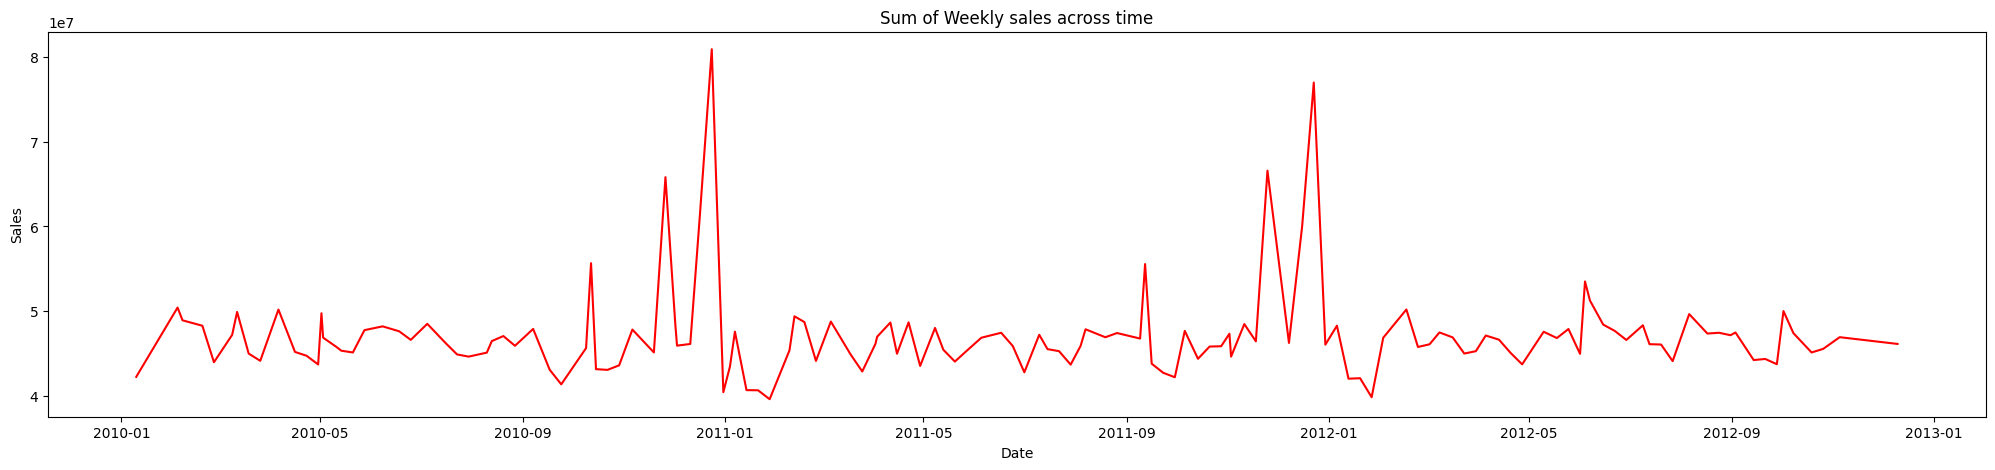

In [ ]:
# Sum of sales  across time
sales_across_time = df_new.groupby(by = ['Date'], as_index = False)['Weekly_Sales'].sum()

plt.figure(figsize = (25,5))
plt.plot(sales_across_time.Date, sales_across_time.Weekly_Sales,color="r")
plt.title("Sum of Weekly sales across time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show

# Sales are generally constant, except on certain months (Nov, Dec)

<ipython-input-23-92a67e7acc54>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = yearly_sales.index, y = yearly_sales.values, palette = 'rocket')


Text(0.5, 0, 'Years')

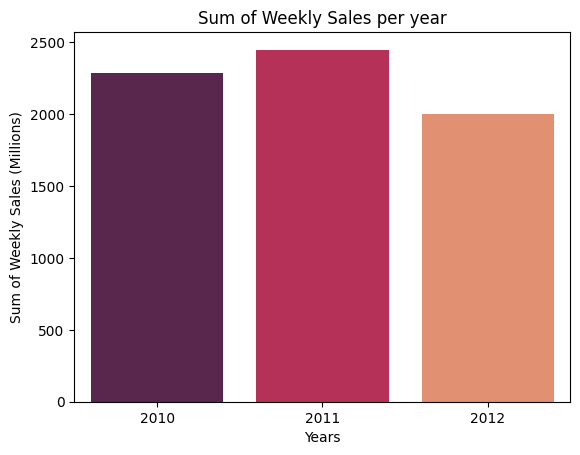

In [ ]:
yearly_sales = df_new.groupby(df_new.Date.dt.year)['Weekly_Sales'].sum()/1000000
sns.barplot(x = yearly_sales.index, y = yearly_sales.values, palette = 'rocket')
plt.title("Sum of Weekly Sales per year")
plt.ylabel("Sum of Weekly Sales (Millions)")
plt.xlabel("Years")

# Sum of Weekly sales is the highest in 2011 -- look into factors that may affect the sales

<ipython-input-24-251d5e092bb5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = monthly_sales.index, y = monthly_sales.values, palette='flare')


Text(0.5, 1.0, 'Sum of weekly sales per month')

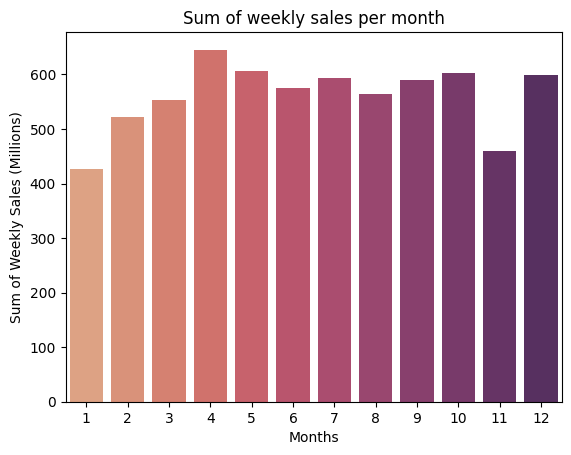

In [ ]:
# Sum of weekly sales each month, across the years
monthly_sales = df_new.groupby(df_new.Date.dt.month)['Weekly_Sales'].sum()/1000000
sns.barplot(x = monthly_sales.index, y = monthly_sales.values, palette='flare')
plt.xlabel('Months')
plt.ylabel('Sum of Weekly Sales (Millions)')
plt.title("Sum of weekly sales per month")

# Sum of weekly sales is the highest in April, followed by October

* Sales experience a noticeable boost during special promotions and holidays (like Black Friday, Christmas, and New Year), but this is often followed by a drop. Afterward, sales pick up again in certain months.

* November shows a dip in purchasing activity, likely because customers are waiting for upcoming sales.

* The data for December 2013 seems to be incomplete; although there was a surge, overall sales didn't reach significant levels due to the limited data available.

## Sales Trends by Time:

Weekly sales surge by approximately 20% during November and December due to holiday promotions. Sales decline by approximately 15% in January post-holiday season.

In [ ]:
# Further deepdive into specific dates that drives highest weekly sales
# Top 5 dates where weekly_sales are the highest
sales_across_time = df_new.groupby(by = ['Date'], as_index = False)['Weekly_Sales'].sum()
sort_sales_across_time = sales_across_time.sort_values('Weekly_Sales', ascending = False) # sort in descending order
sort_sales_across_time.head(5)

,Date,Weekly_Sales
46,2010-12-24,80931415.60
98,2011-12-23,76998241.31
95,2011-11-25,66593605.26
41,2010-11-26,65821003.24
45,2010-12-17,61820799.85


#### Qns 2. What is the trend in average unemployment rate across time


<function matplotlib.pyplot.show(close=None, block=None)>

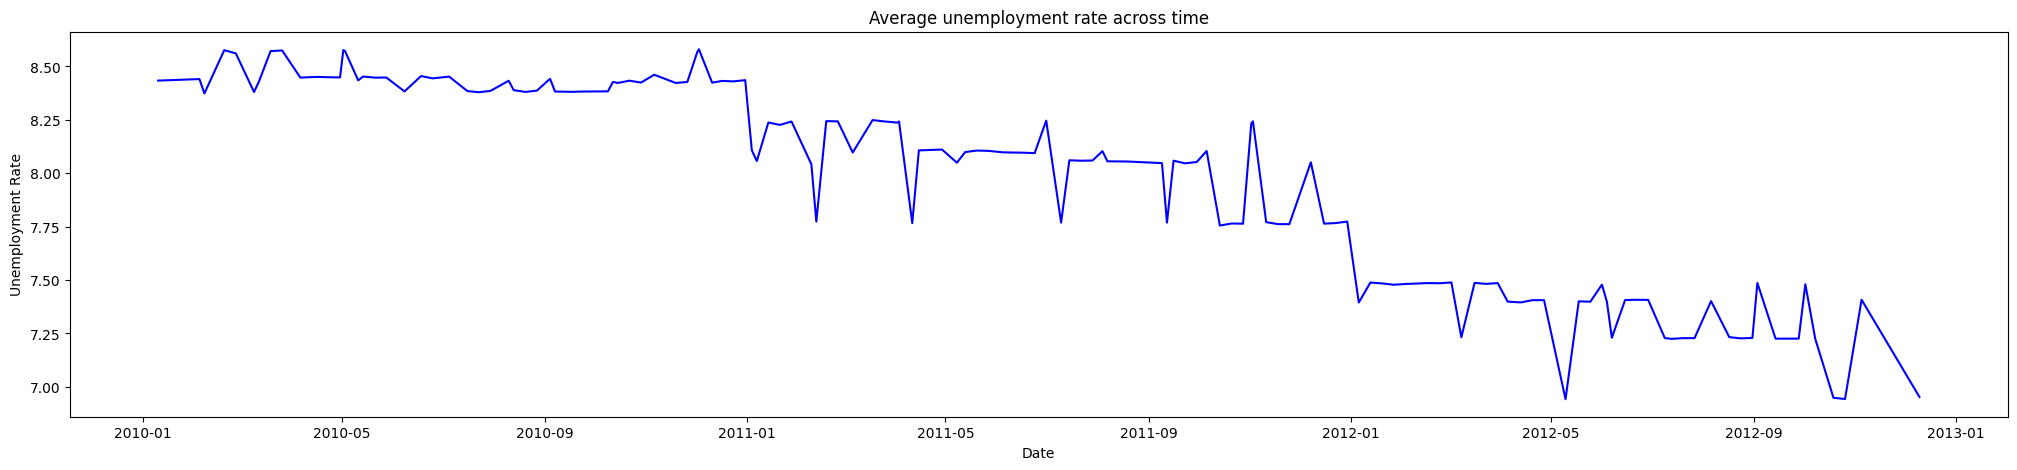

In [ ]:
# Unemployment across time
unn_across_time = df_new.groupby(by = ['Date'], as_index= False)['Unemployment'].mean() # average rate of unemployment each date for all the different outlets
plt.figure(figsize = (25,5))
plt.plot(unn_across_time.Date, unn_across_time.Unemployment,color="b")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate")
plt.title("Average unemployment rate across time")
plt.show

**Findings:-**
* January 2010 to December 2012: Gradual decrease in the unemployment rate.This result in improving the purchasing power of the customer.

#### Qns 3. What is the trend in average CPI across time
- Analyse the change in prices paid for a basket of consumer goods and services. Serves as an indicator of inflation rate
- **Consumer price index - measure of the average change overtime in the prices paid for a basket of consumer goods and services Higher CPI indicates a higher inflation**

Text(0.5, 1.0, 'Average CPI across time')

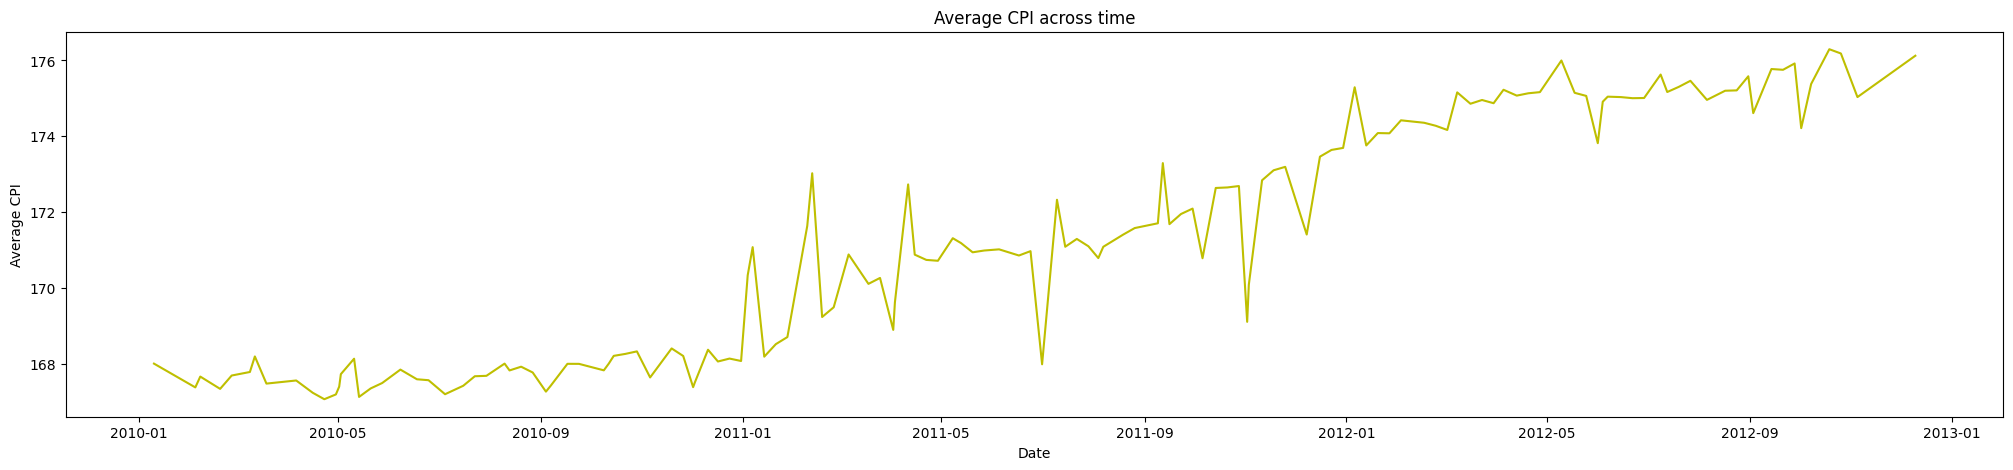

In [ ]:
# CPI across time
cpi_across_time = df_new.groupby(by = ['Date'], as_index= False)['CPI'].mean()
plt.figure(figsize = (25,5))
plt.plot(cpi_across_time.Date, cpi_across_time.CPI, color="y")
plt.xlabel('Date')
plt.ylabel("Average CPI")
plt.title("Average CPI across time")
# CPI generally increases across the years

Findings:
* January 2010 to December 2012: We have noted a gradual increase in the consumer price index from due to inflation.

#### Qns 4. What is the trend in average Fuel price, Temperature across time

Text(0.5, 1.0, 'Average Fuel Price across time')

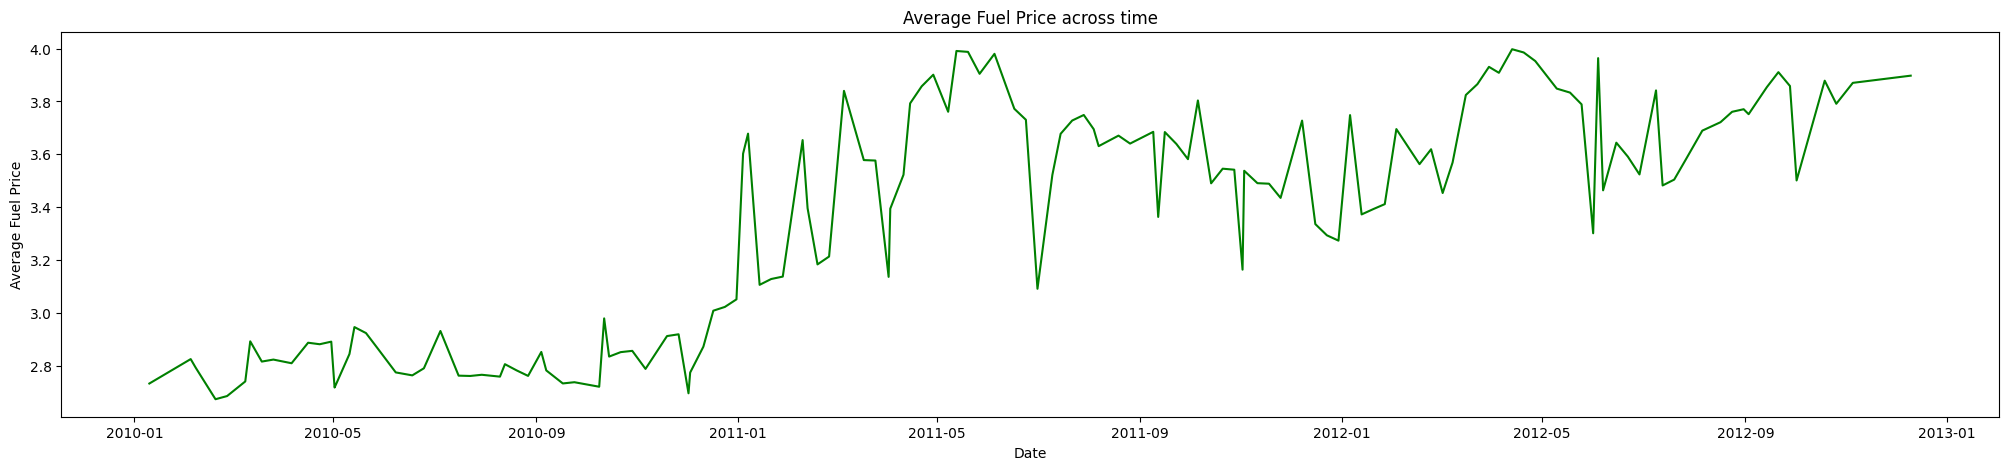

In [ ]:
# Average fuel price across time
fuel_across_time = df_new.groupby(by = ['Date'], as_index= False)['Fuel_Price'].mean()
plt.figure(figsize=(25,5))
plt.plot(fuel_across_time.Date, fuel_across_time.Fuel_Price, color="g")
plt.xlabel('Date')
plt.ylabel('Average Fuel Price')
plt.title("Average Fuel Price across time")
# Average fuel price is generally increasing across the years

Findings:-

* January 2010 to December 2010: Stable fuel price rate with no significant changes.  
* January 2011 to December 2012: Gradual increase in fuel prices attributed to inflationary factors.

Text(0.5, 1.0, 'Average Temperature across time')

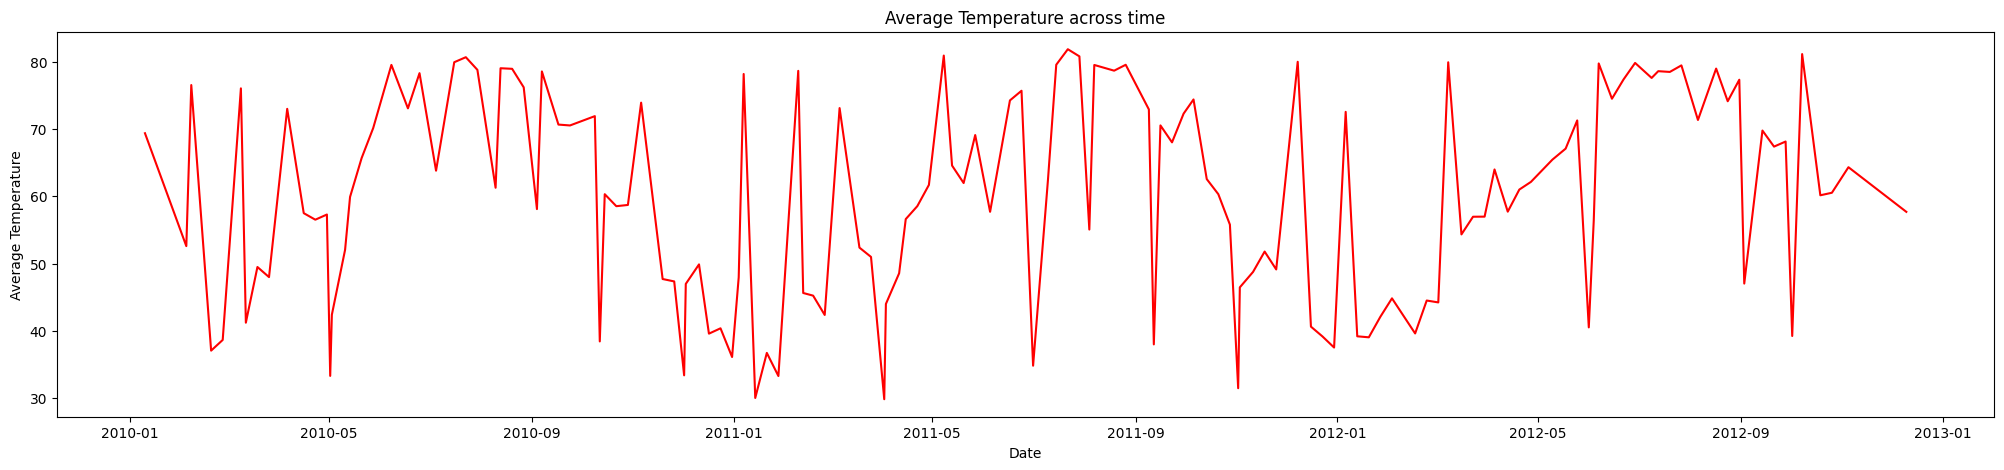

In [ ]:
# Temperature  across time
temp_across_time = df_new.groupby(by = ['Date'], as_index= False)['Temperature'].mean()
plt.figure(figsize=(25,5))
plt.plot(temp_across_time.Date, temp_across_time.Temperature, color="r")
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title("Average Temperature across time")
# Average fuel price is generally increasing across the years

#### Qns 5. Which stores have the highest earners?

<ipython-input-30-3302c1e14d78>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = stores_sales.Store, y = stores_sales.Weekly_Sales , data = stores_sales, palette = 'rocket')


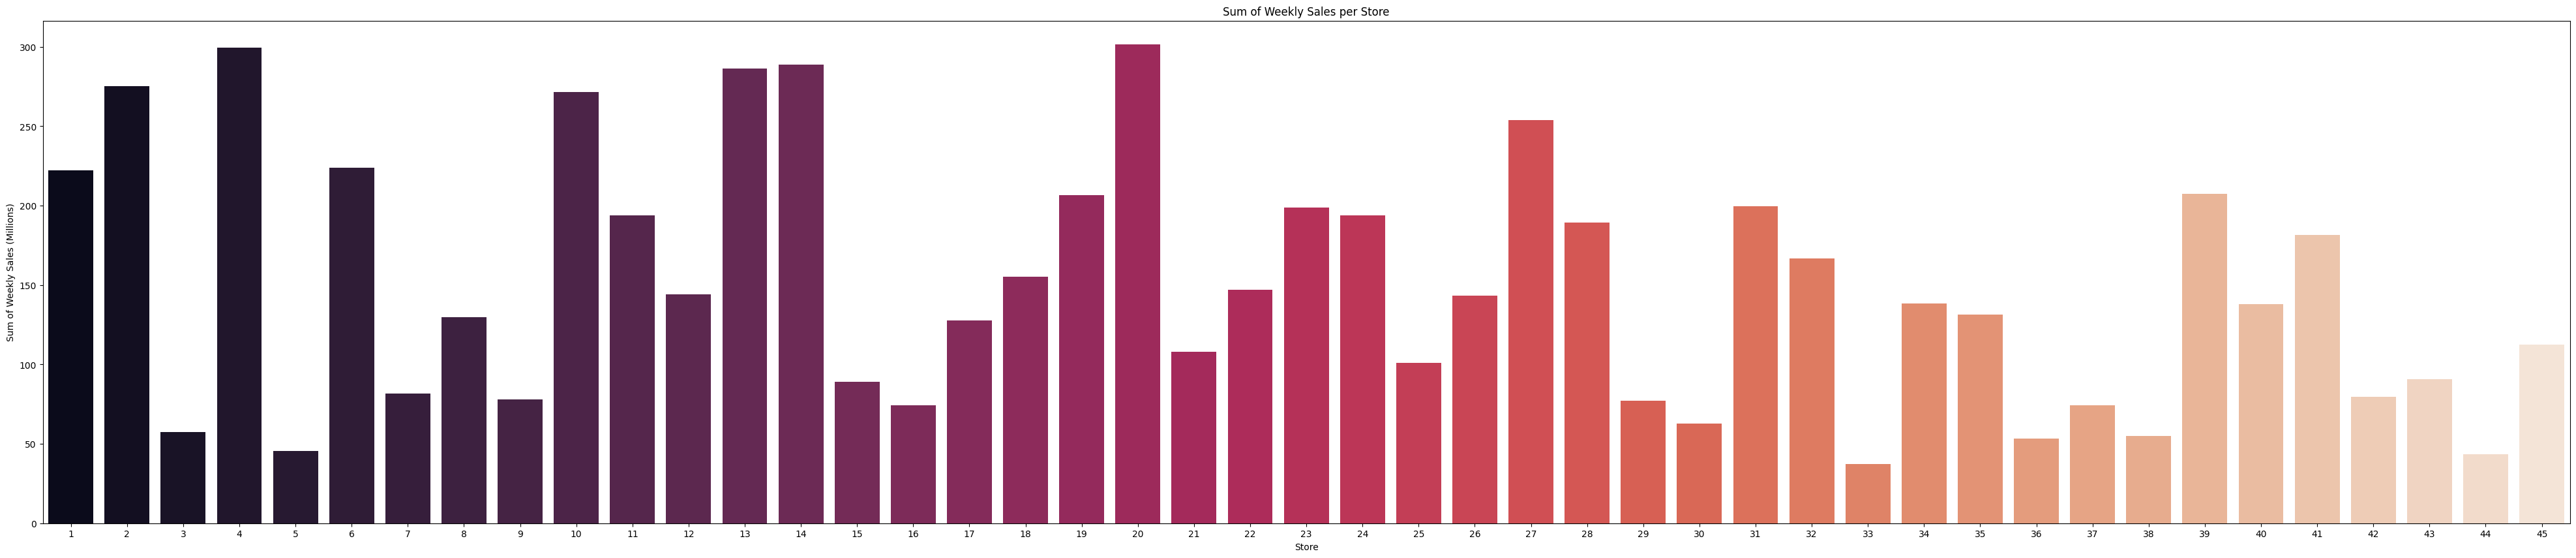

In [ ]:
# Sum of weekly sales across Stores
stores_sales = df_new.groupby(by = ['Store'], as_index= False)['Weekly_Sales'].sum()
stores_sales['Weekly_Sales'] = stores_sales['Weekly_Sales']/1000000
plt.figure(figsize= (50,10))
sns.barplot(x = stores_sales.Store, y = stores_sales.Weekly_Sales , data = stores_sales, palette = 'rocket')
plt.xlabel('Store')
plt.ylabel('Sum of Weekly Sales (Millions)')
plt.title('Sum of Weekly Sales per Store')
plt.show()

# Stores 4, 14, 20 are the stores with the highest sales across time

Findings:
Store number 20 and 4 were identified as the top earners based on their weekly sales, while store number 44, 33, 3 and 5 emerged as the least profitable.

#### Qns 6. Which type of store have the highest earner

<ipython-input-31-a9b5c732e5a6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = type_sales.Type, y = type_sales.Weekly_Sales , data = type_sales, palette = 'rocket')


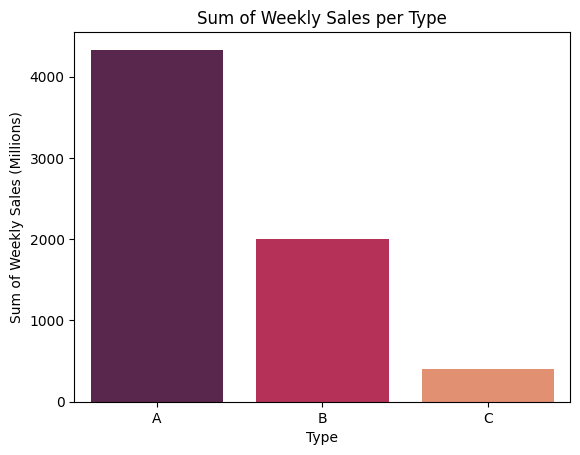

In [ ]:
# Sum of weekly sales across Type
type_sales = df_new.groupby(by = ['Type'], as_index= False)['Weekly_Sales'].sum()
type_sales['Weekly_Sales'] = type_sales['Weekly_Sales']/1000000
sns.barplot(x = type_sales.Type, y = type_sales.Weekly_Sales , data = type_sales, palette = 'rocket')
plt.xlabel('Type')
plt.ylabel('Sum of Weekly Sales (Millions)')
plt.title('Sum of Weekly Sales per Type')
plt.show()

# Type A has the highest sales

Findings:
Store type A, succeeded by store type B, were identified as the store types with the highest earnings, while store type C exhibited the lowest weekly sales.

**Store Characteristics and Sales:**
* Store Types A and B experience a slight yearly sales decrease of around 5% despite higher store counts.
* Store Type C maintains consistent sales and shows a slight yearly increase of about 3% in sales.

#### Qns 7. Which departments have the highest earner?

<ipython-input-32-2edbe42d7ad3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = dept_sales.Dept, y = dept_sales.Weekly_Sales , data = dept_sales, palette ='rocket')


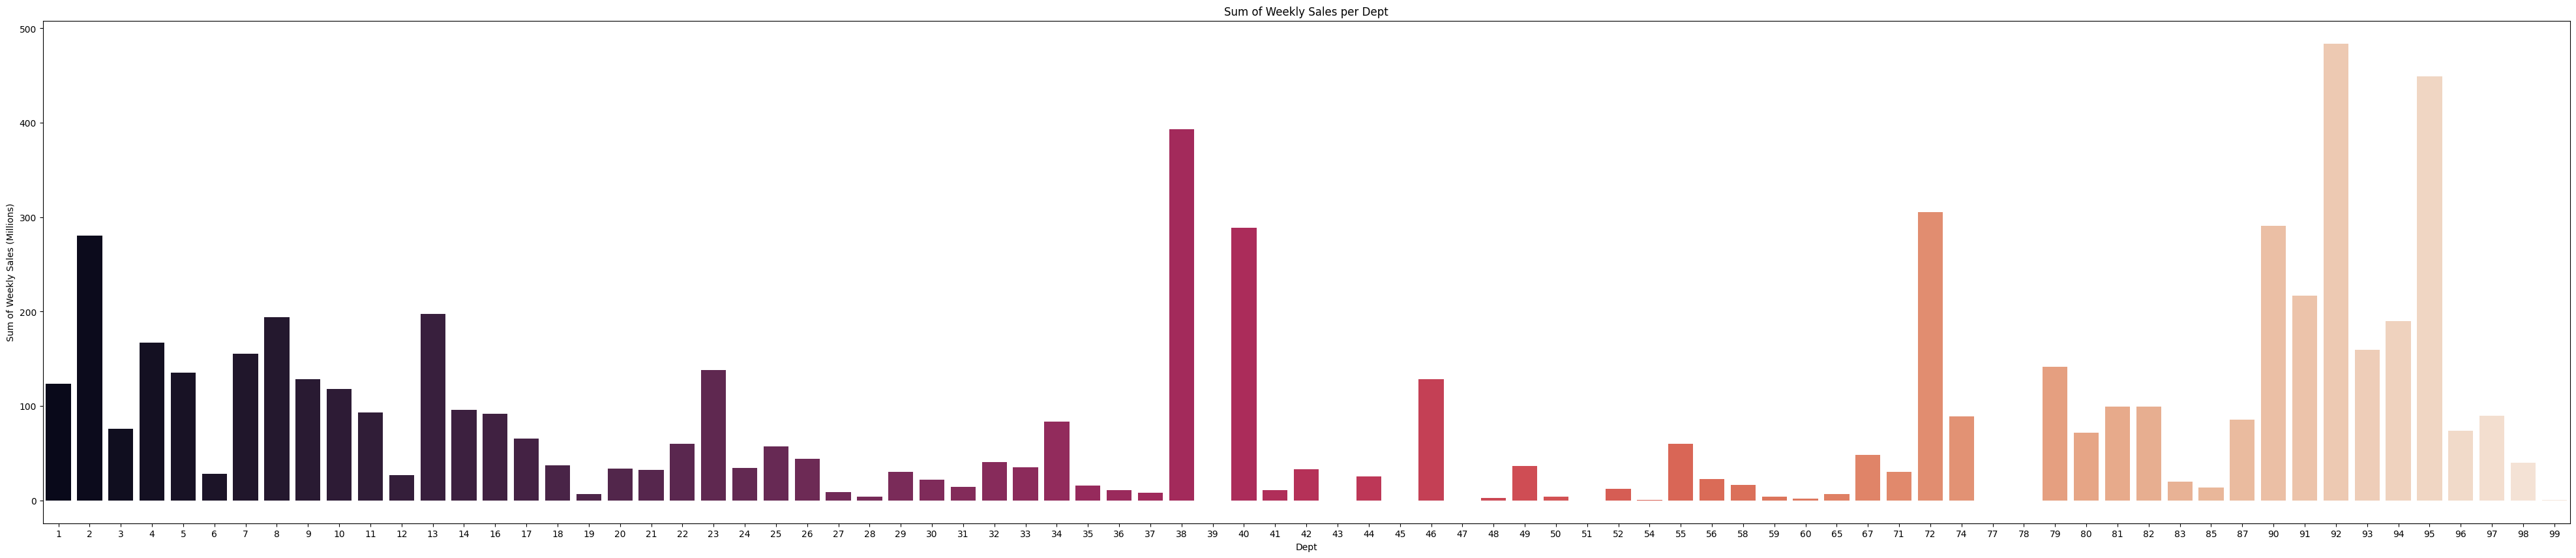

In [ ]:
# Sum of weekly sales across Department
dept_sales = df_new.groupby(by = ['Dept'], as_index= False)['Weekly_Sales'].sum()
dept_sales['Weekly_Sales'] = dept_sales['Weekly_Sales']/1000000
plt.figure(figsize=(50,10))
sns.barplot(x = dept_sales.Dept, y = dept_sales.Weekly_Sales , data = dept_sales, palette ='rocket')
plt.xlabel('Dept')
plt.ylabel('Sum of Weekly Sales (Millions)')
plt.title('Sum of Weekly Sales per Dept')
plt.show()

# dept 38, 92,95 have the highest sales

Findings:

Certain departments (1-15, 38, 40, 72, and 90-95) demonstrate notably higher weekly sales, with an average increase of 25%.

#### Qns 8: Trend of markdown across time

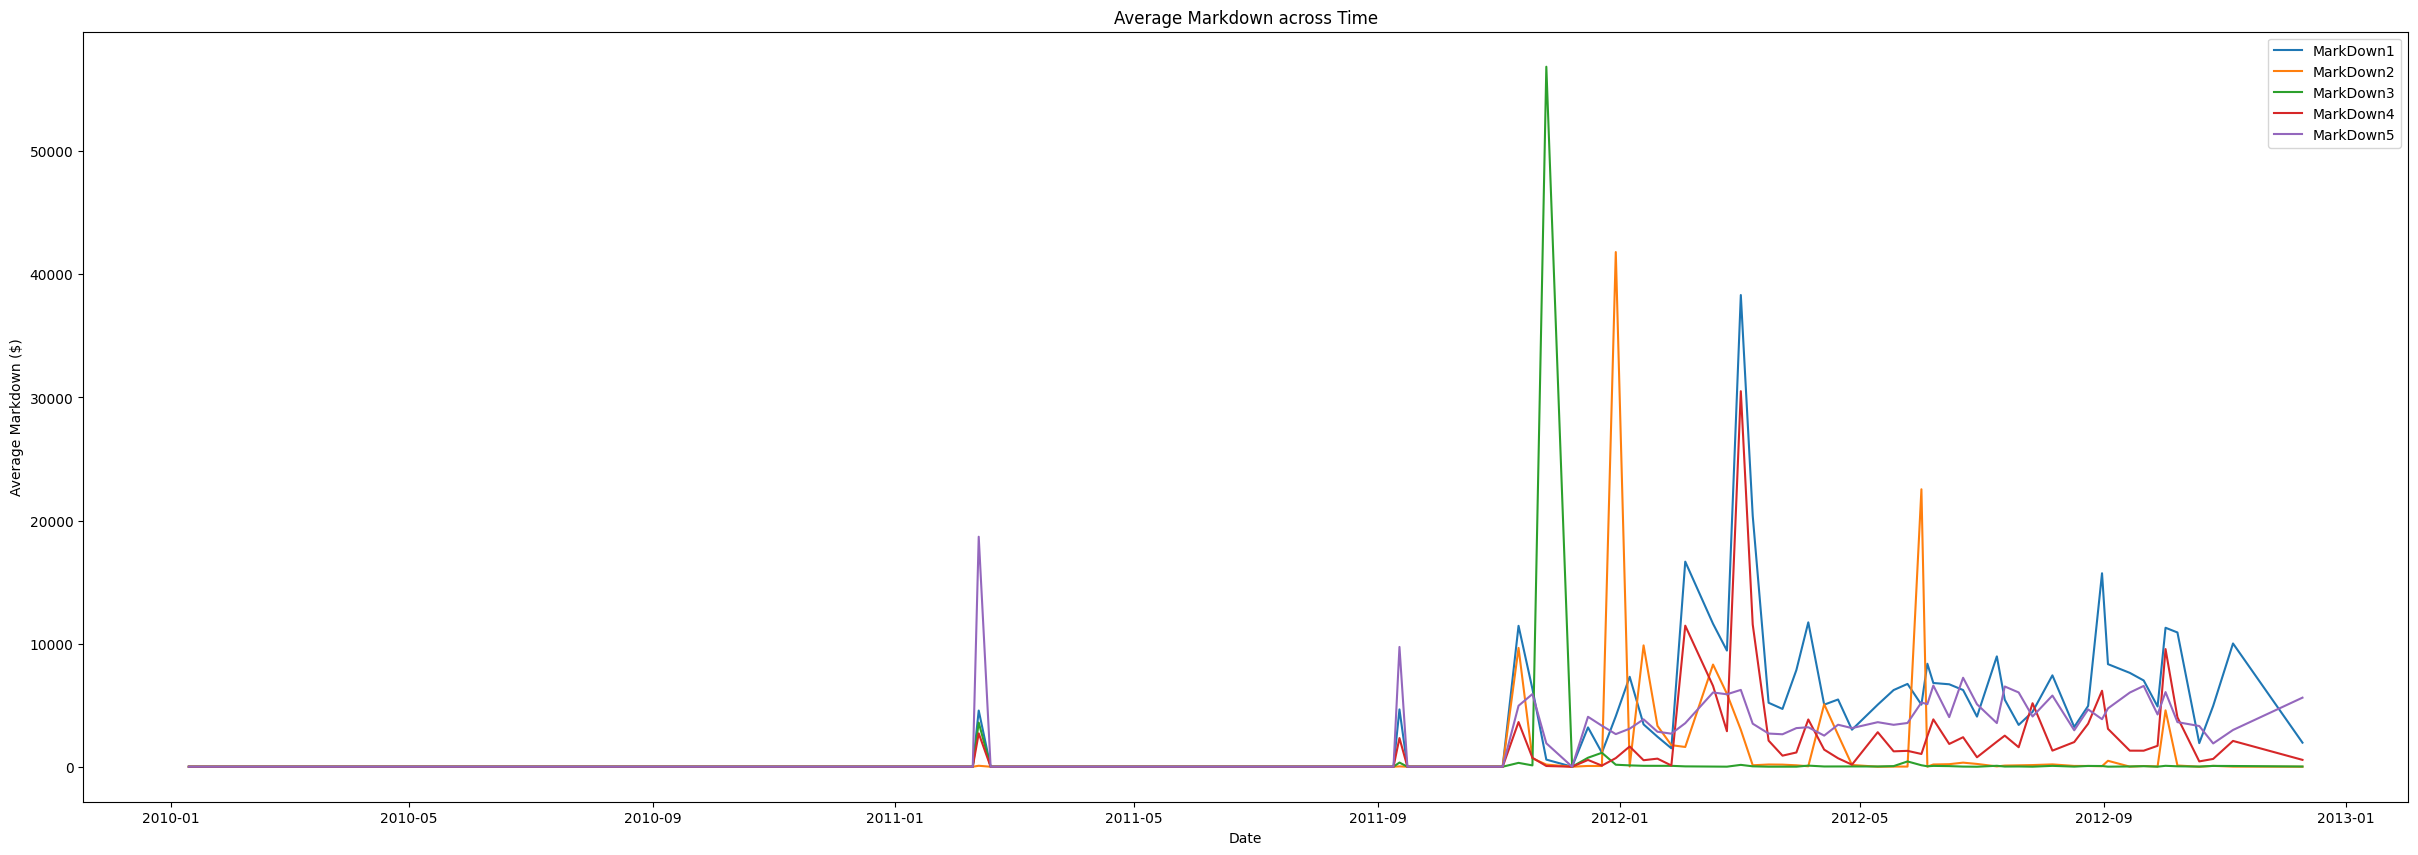

In [ ]:
# Average Markdown across time
df_markdown = df_new.groupby('Date').agg({'MarkDown1': 'mean', 'MarkDown2': 'mean', 'MarkDown3': 'mean', 'MarkDown4': 'mean', 'MarkDown5': 'mean'})
plt.figure(figsize = (30,10))

plt.plot(df_markdown.index, df_markdown.MarkDown1, label = 'MarkDown1')
plt.plot(df_markdown.index, df_markdown.MarkDown2, label = 'MarkDown2')
plt.plot(df_markdown.index, df_markdown.MarkDown3, label = 'MarkDown3')
plt.plot(df_markdown.index, df_markdown.MarkDown4, label = 'MarkDown4')
plt.plot(df_markdown.index, df_markdown.MarkDown5, label = 'MarkDown5')


plt.xlabel("Date")
plt.ylabel("Average Markdown ($)")
plt.title("Average Markdown across Time")
plt.legend(loc = 'best')

Text(0.5, 1.0, 'Average Markdown per Month')

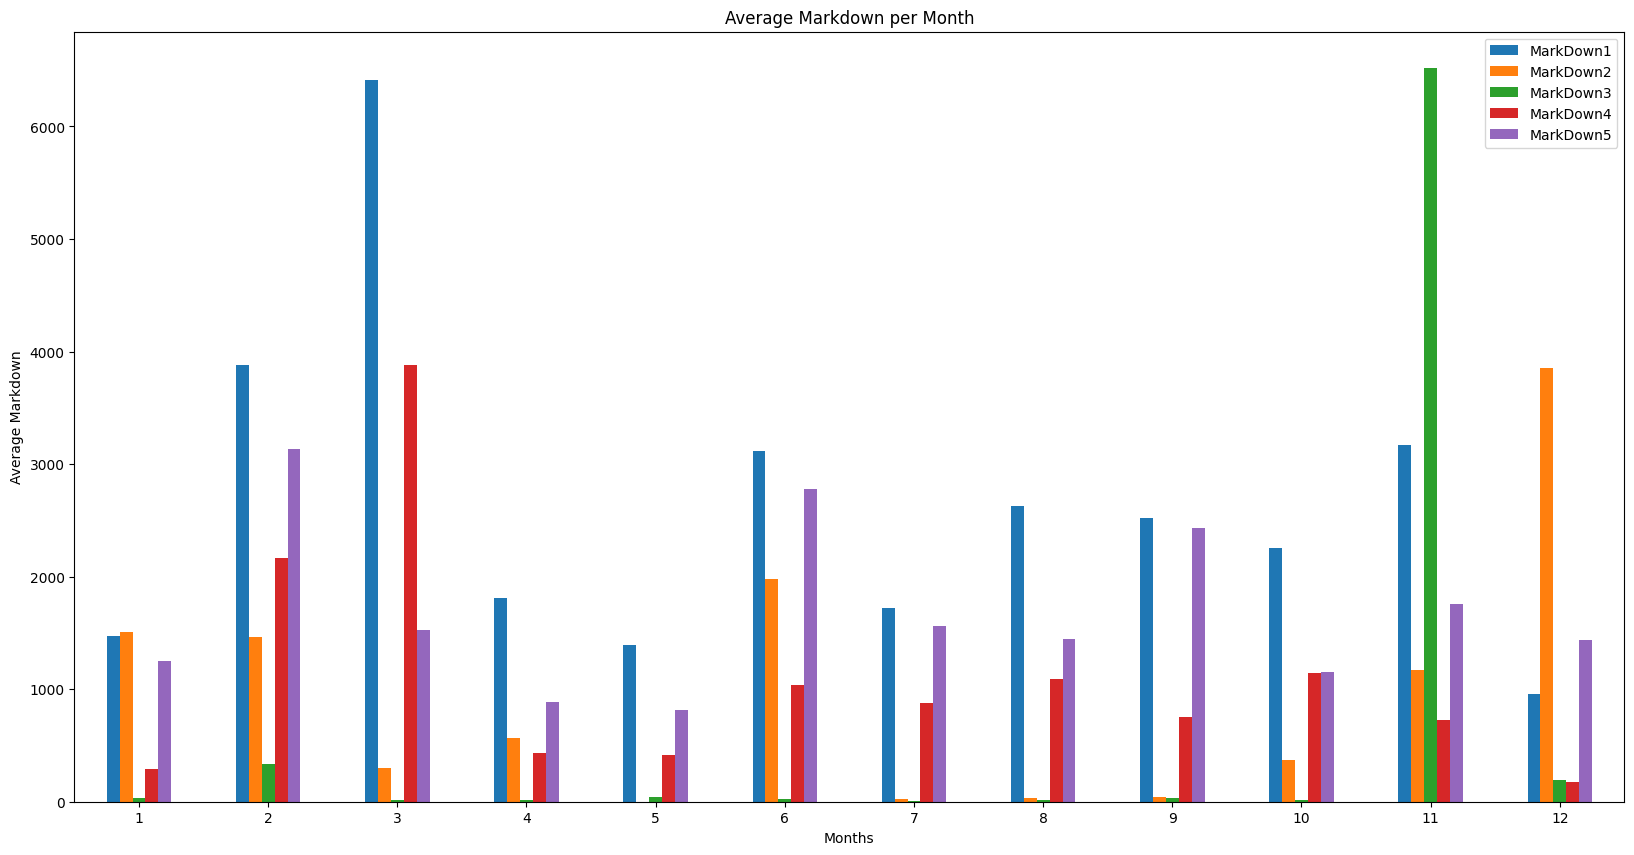

In [ ]:
# Markdown across months
df_markdown_month = df_new.groupby(df_new.Date.dt.month).agg({'MarkDown1': 'mean', 'MarkDown2': 'mean', 'MarkDown3': 'mean', 'MarkDown4': 'mean', 'MarkDown5': 'mean'})
df_markdown_month.head()
df_markdown_month.plot(kind = 'bar', figsize = (20,10), rot = 0)
plt.xlabel("Months")
plt.ylabel('Average Markdown')
plt.title('Average Markdown per Month')

# Markdown3 is the highest in November and markdown 1 is highest in March

#### Qns 9: Trend of markdown across types

Text(0.5, 1.0, 'Average Markdown per Type')

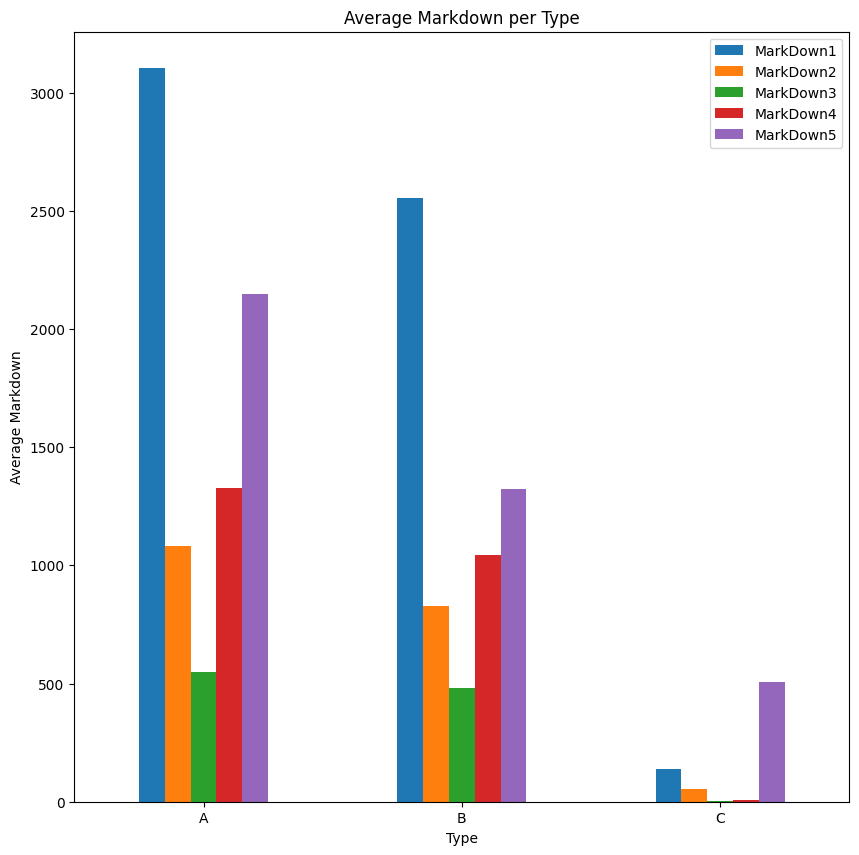

In [ ]:
# Markdown across Type
# Markdown across months
df_markdown_type = df_new.groupby(df_new.Type).agg({'MarkDown1': 'mean', 'MarkDown2': 'mean', 'MarkDown3': 'mean', 'MarkDown4': 'mean', 'MarkDown5': 'mean'})
df_markdown_type.head()
df_markdown_type.plot(kind = 'bar', figsize = (10,10), rot = 0)
plt.xlabel("Type")
plt.ylabel('Average Markdown')
plt.title('Average Markdown per Type')

# Markdown1 is the highest for Type A, B while markdown 5 is the highest for type C

#### Qns 10:Correlation of factors and weekly sales

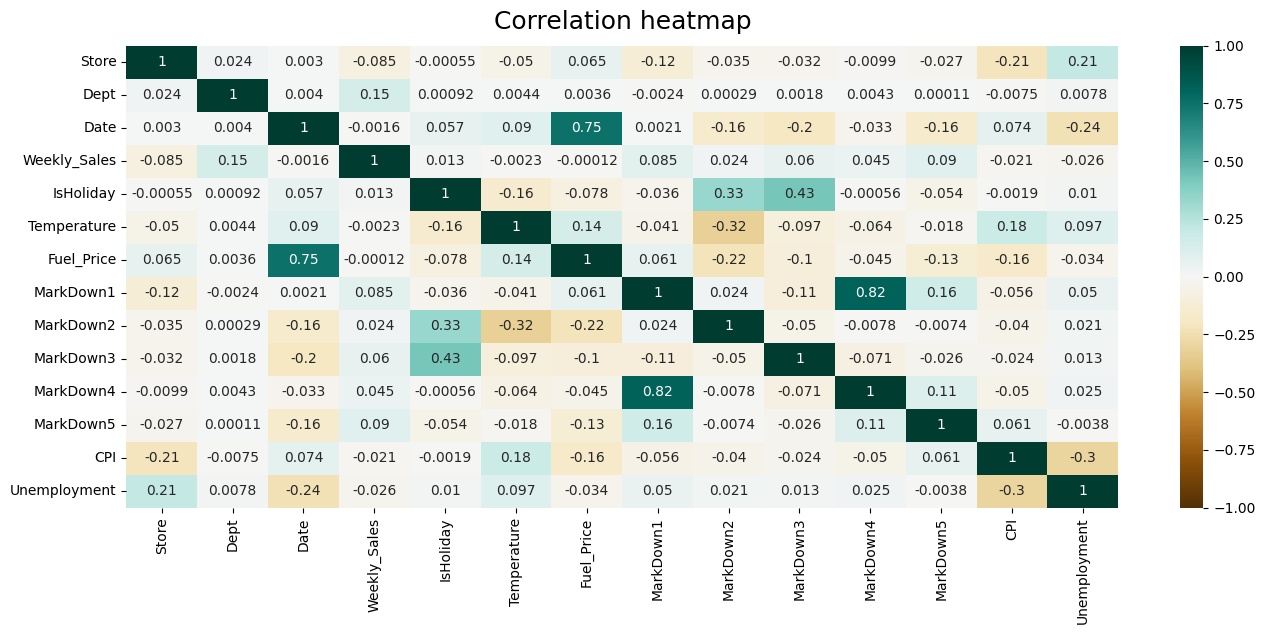

In [ ]:
plt.figure(figsize = (16,6))
df_new = pd.DataFrame(df_new)
df_new = df.astype(float, errors = 'ignore')
heatmap = sns.heatmap(df_new.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Correlation heatmap', fontdict = {'fontsize':18}, pad=12);

**Findings**
* Weekly sales do not exhibit a strong correlation with other parameters.
* Consumer Price Index (CPI) and Unemployment display a negative correlation.
* Unemployment and Fuel Price are also negatively correlated.

* **November-December Sales Trend:** There's a noticeable spike in weekly sales during November and December; however, overall sales haven't shown a consistent increase throughout the year.
* **Holiday Sales Peaks:** Sales figures experience significant peaks during weeks close to holidays.
* **Fuel and Consumer Price Index:** Both fuel prices and the Consumer Price Index have shown a steady increase over the course of the year.
* **Unemployment Trend:** The unemployment rate has steadily decreased each year.
* **Temperature Pattern:** Temperature data exhibits a random walk, indicating no clear pattern or trend over time.

In conclusion, understanding the dynamics of sales patterns, store types, and departmental performance is essential for effective business strategies. The data provides valuable insights for optimizing sales approaches, managing inventory, and tailoring marketing efforts to maximize revenue and enhance customer satisfaction.

# **Data Preprocessing and Feature Engineering:**

Handle missing values, especially in the MarkDown data.

Create new features that could influence sales (e.g., store size/type, regional factors).

###**Dataset Inspection**

In [ ]:
#Merging all the 3 dataset together
sale_store_df = sales_df.merge(store_df, on = 'Store',how='left')
print(sale_store_df.shape)
retail_df = sale_store_df.merge(feature_df, on = ['Store','Date','IsHoliday'],how='left')
retail_df.shape

(421570, 7)


(421570, 16)

In [ ]:
final_df=retail_df.copy()

In [ ]:
#Check for missing values
final_df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Type,0
Size,0
Temperature,0
Fuel_Price,0
MarkDown1,270889


In [ ]:
#Check for duplicate rows
final_df.duplicated().sum()

np.int64(0)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [ ]:
# Convert dates to datetime objects
final_df['Date'] = pd.to_datetime(final_df['Date'],format='%d/%m/%Y')

In [ ]:
final_df.describe()

,Store,Dept,Date,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-19 05:35:51.733757184,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
min,1.000000,1.000000,2010-01-10 00:00:00,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2010-10-12 00:00:00,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,2012-03-02 00:00:00,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,2012-12-10 00:00:00,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000
std,12.785297,30.492054,NaN,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296


###**To effectively combine missing value handling and data normalization for sales data, follow this step-by-step process:**

- **Handle Missing Values:** Use techniques like imputation (e.g., mean, median) or interpolation to address missing values in your sales data. This step ensures that you have a complete dataset for analysis.

- **Normalize Sales Data**: Apply one of the normalization techniques discussed earlier to bring all sales data on a consistent scale.

- **Square root Transformation** to handle skewness

- **Anomaly Detection on Weekly Sales:** Finally, use the preprocessed and normalized data for anomaly detection.

By following this process, you ensure that your anomaly detection models are working with clean, consistent, and normalized sales data, increasing their accuracy and reliability.

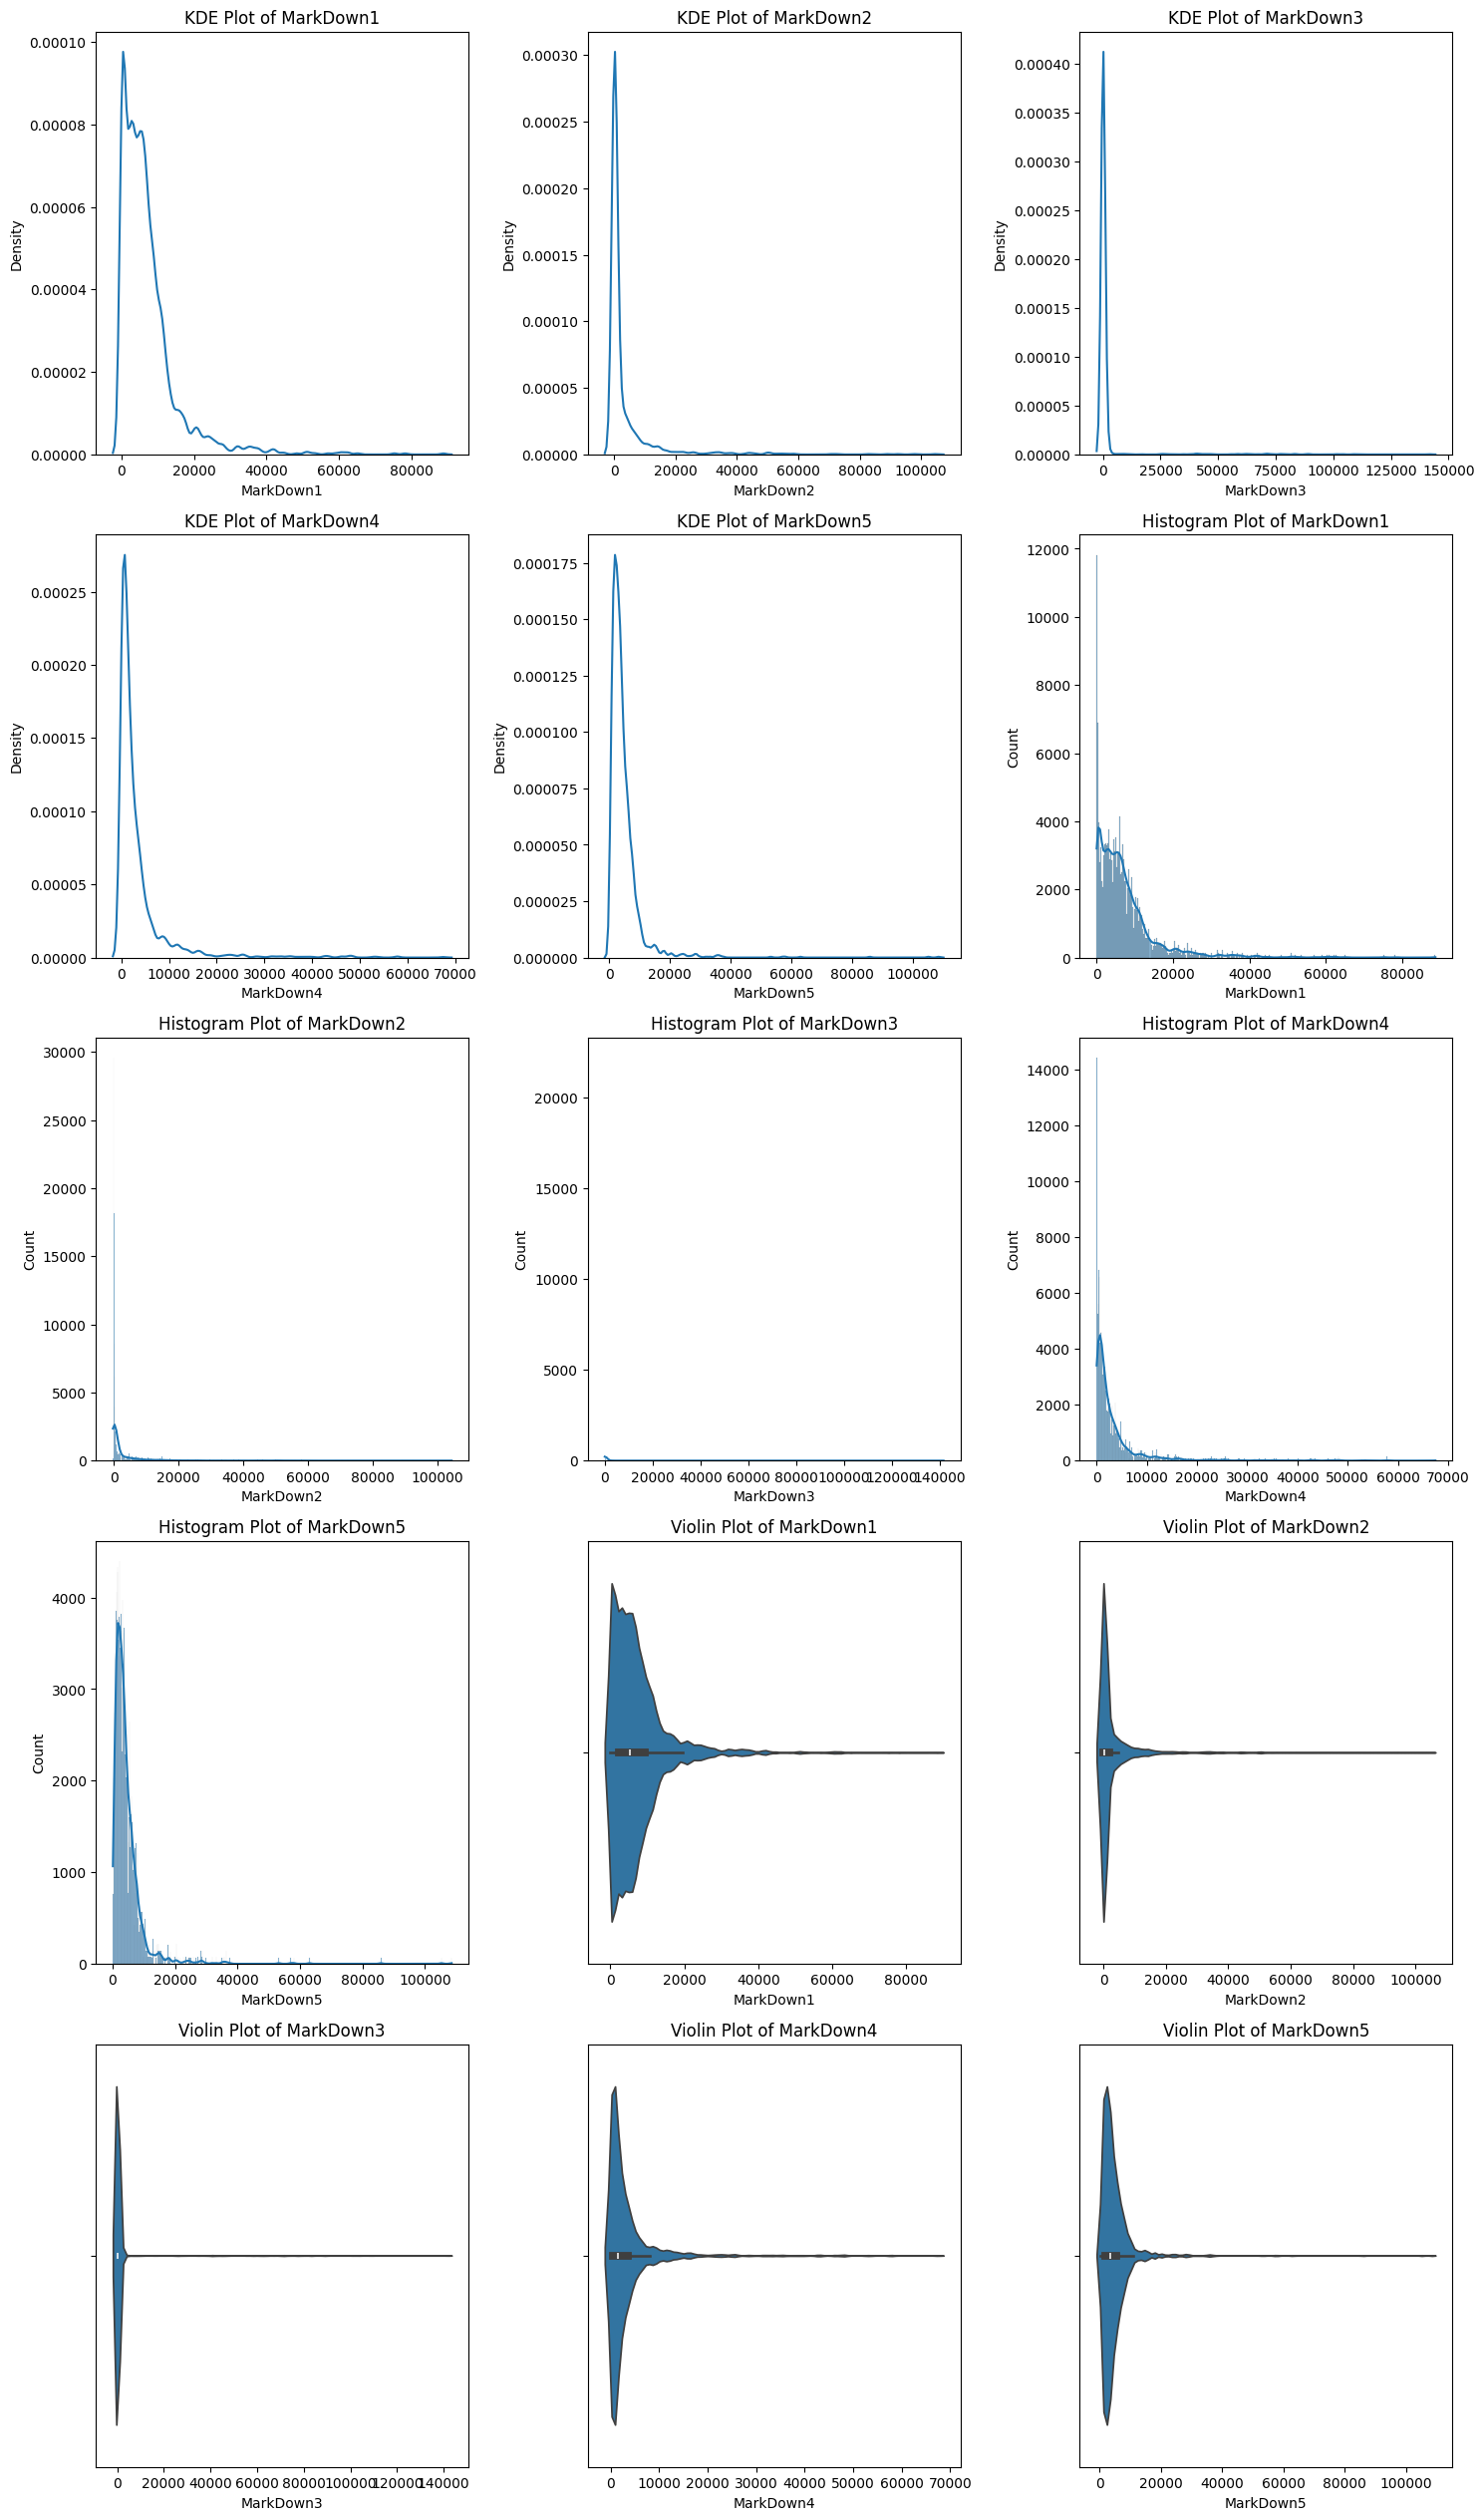

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the features for which you want to create plots
features = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Calculate the number of rows and columns needed for each type of plot
num_features = len(features)
num_cols = 2 if num_features % 2 == 0 else 3  # Adjust for odd number of features
num_rows = (num_features + num_cols - 1) // num_cols

# Set up the figure and axes for all three types of plots
fig, axes = plt.subplots(nrows=3*num_rows, ncols=num_cols, figsize=(15, 30))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over each feature and create plots
for i, feature in enumerate(features):
    # KDE Plot
    sns.kdeplot(data=final_df, x=feature, ax=axes[i])
    axes[i].set_title(f'KDE Plot of {feature}')
    axes[i].set_xlabel(feature)

    # Histogram Plot
    sns.histplot(data=final_df, x=feature, kde=True, ax=axes[i + num_features])
    axes[i + num_features].set_title(f'Histogram Plot of {feature}')
    axes[i + num_features].set_xlabel(feature)

    # Violin Plot
    sns.violinplot(data=final_df, x=feature, ax=axes[i + 2 * num_features])
    axes[i + 2 * num_features].set_title(f'Violin Plot of {feature}')
    axes[i + 2 * num_features].set_xlabel(feature)

# Hide any unused subplots
for j in range(3 * num_features, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


**Findings:-**
* The histogram clearly depicts that distribution of Markdown features do not follow a normal distribution, it's right skewed distribution.
* Secondly the boxplot shows outliers in Markdown features,the percentage of this outliers are nearly in the range of 5-8 percent of total records.

**Approach:-**
* Handling the Outliers, in this scenerio outlier removal based on IQR threshold value not recommended because it may result in removal of 10% of data from dataset, it lead to data loss and less data availability while training.
* We will go forward with robust statistical estimators that are less sensitive to outliers, such as the median instead of the mean imputation of null values.

This will help to make the data distribution more symmetric and reduce the impact of outliers in the Markdown features distribution

##**Cleaning the data before anomaly detection and handling.**

### **Step:1-** **Handle Missing Values: Use techniques like imputation median to address missing values in your Markdown data. This step ensures that you have a complete dataset for analysis.**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Handle Missing Values (Impute with Mean)
median_markdown1 = final_df['MarkDown1'].median()
median_markdown2 = final_df['MarkDown2'].median()
median_markdown3 = final_df['MarkDown3'].median()
median_markdown4 = final_df['MarkDown4'].median()
median_markdown5 = final_df['MarkDown5'].median()

final_df['MarkDown1'].fillna(median_markdown1, inplace=True)
final_df['MarkDown2'].fillna(median_markdown2, inplace=True)
final_df['MarkDown3'].fillna(median_markdown3, inplace=True)
final_df['MarkDown4'].fillna(median_markdown4, inplace=True)
final_df['MarkDown5'].fillna(median_markdown5, inplace=True)

<ipython-input-45-02e87c786925>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['MarkDown1'].fillna(median_markdown1, inplace=True)
<ipython-input-45-02e87c786925>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

###**Visualization of Markdowns after handling missing values**

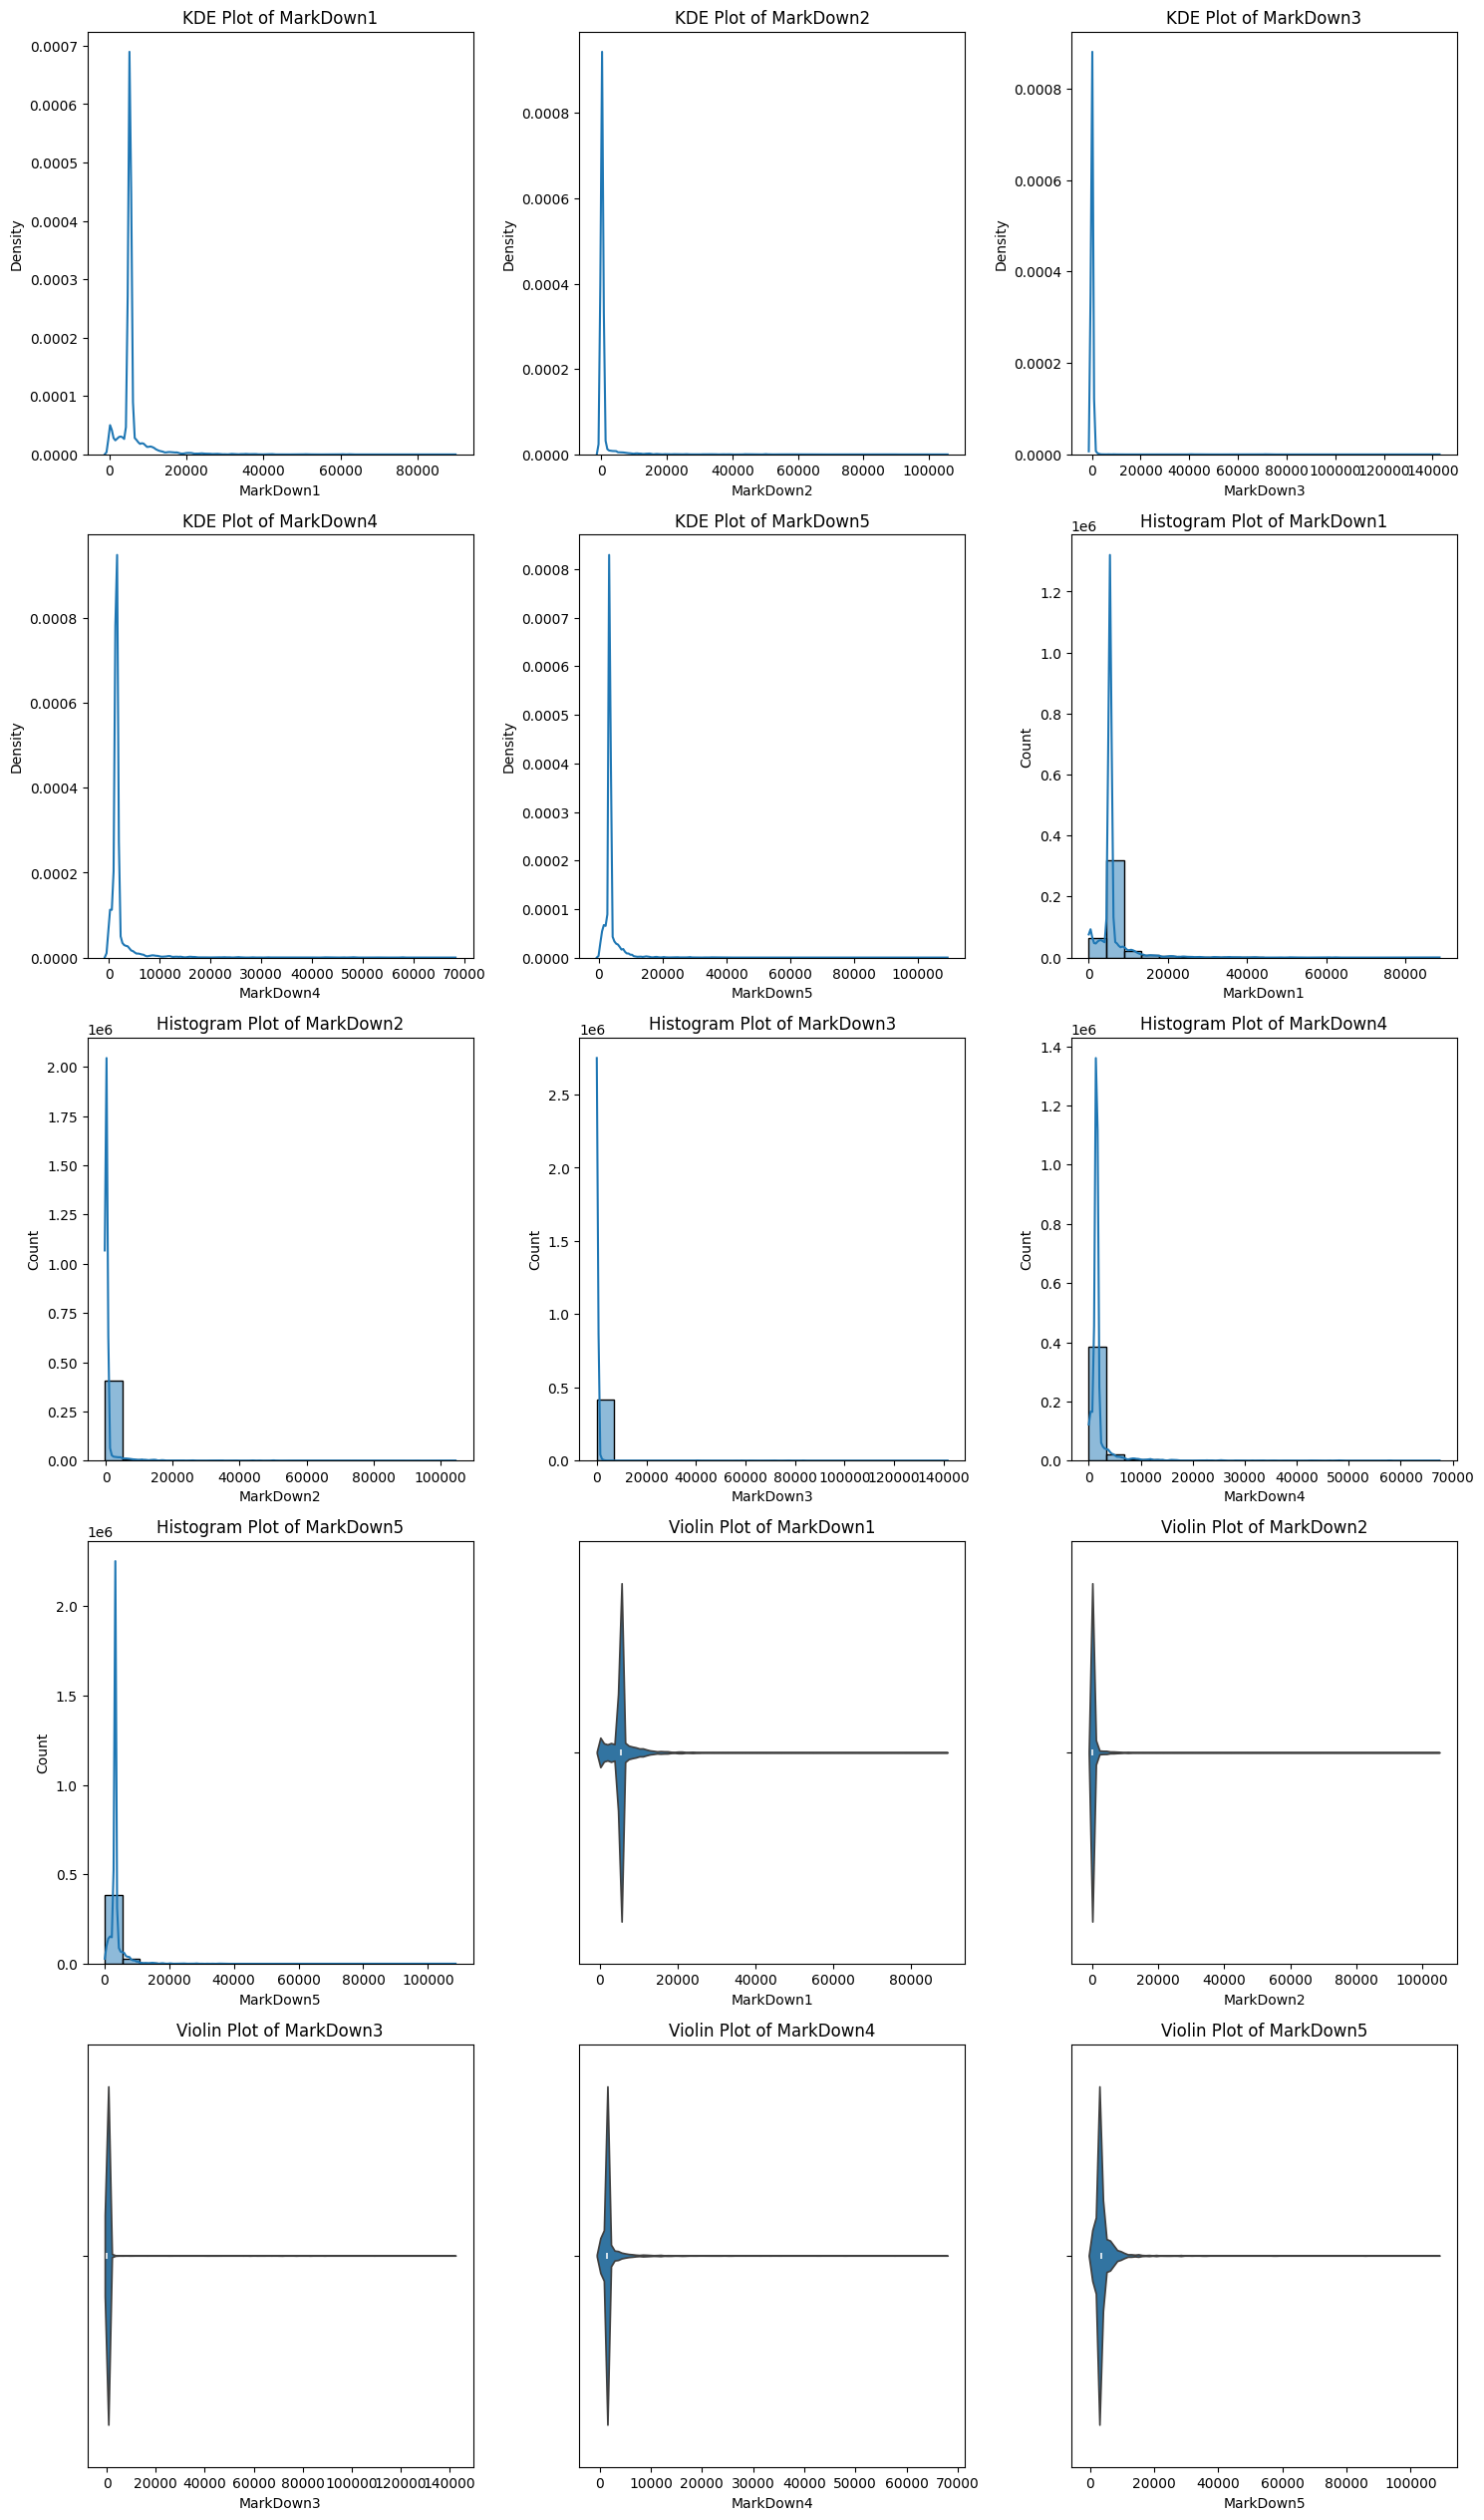

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the features for which you want to create plots
features = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Calculate the number of rows and columns needed for each type of plot
num_features = len(features)
num_cols = 2 if num_features % 2 == 0 else 3  # Adjust for odd number of features
num_rows = (num_features + num_cols - 1) // num_cols

# Set up the figure and axes for all three types of plots
fig, axes = plt.subplots(nrows=3*num_rows, ncols=num_cols, figsize=(15, 30))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over each feature and create plots
for i, feature in enumerate(features):
    # KDE Plot
    sns.kdeplot(data=final_df, x=feature, ax=axes[i])
    axes[i].set_title(f'KDE Plot of {feature}')
    axes[i].set_xlabel(feature)

    # Histogram Plot
    sns.histplot(data=final_df, x=feature, kde=True, ax=axes[i + num_features])
    axes[i + num_features].set_title(f'Histogram Plot of {feature}')
    axes[i + num_features].set_xlabel(feature)

    # Violin Plot
    sns.violinplot(data=final_df, x=feature, ax=axes[i + 2 * num_features])
    axes[i + 2 * num_features].set_title(f'Violin Plot of {feature}')
    axes[i + 2 * num_features].set_xlabel(feature)

# Hide any unused subplots
for j in range(3 * num_features, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

###**Step 2:-Normalize Sales Data: Apply one of the normalization techniques discussed earlier to bring all sales data on a consistent scale**.

To handle anomalous data points is to transform them. This involves changing the values of the data points so that they fall within a normal range. There are a number of data transformation techniques that can be used, such as:

Scaling: This involves rescaling the data so that it has a mean of 0 and a standard deviation of 1. This can be helpful for normalizing the data and making it easier to interpret.

In [ ]:
# Step 2: Normalize Sales Data (Standardization)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Reshape the column to a 2D array and apply min-max scaling
final_df['Weekly_Sales_normalized'] = scaler.fit_transform(final_df['Weekly_Sales'].values.reshape(-1, 1))

### **Step-3:-** **Square root Transformation to handle skewness**

Handling Skewed Data Distributions

Skewed data distributions are those that are not normally distributed. This means that the data is not evenly distributed around the mean. Instead, there is a long tail of data points that are much larger or smaller than the mean. This can make it difficult to analyze the data and identify patterns.

Log transformation is a data transformation technique that can be used to handle skewed data distributions. It works by taking the logarithm of the data. This has the effect of compressing the large values and stretching out the small values. This can help to normalize the data distribution and make it easier to analyze.

In [ ]:
final_df['Sales_sqrt'] = final_df['Weekly_Sales_normalized'].apply(lambda x: x ** 0.5)

In [ ]:
final_df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales_normalized,Sales_sqrt
0,1,1,2010-05-02,24924.50,False,A,151315,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,0.042851,0.207004
1,1,1,2010-12-02,46039.49,True,A,151315,38.51,2.548,5347.45,192.0,24.6,1481.31,3359.45,211.242170,8.106,0.073097,0.270365


In [ ]:
from scipy.stats import skew

# Calculate skewness of a column 'data_column'
skewness = skew(final_df['Sales_sqrt'])
print("Skewness:", skewness)

Skewness: 1.5372648545920218


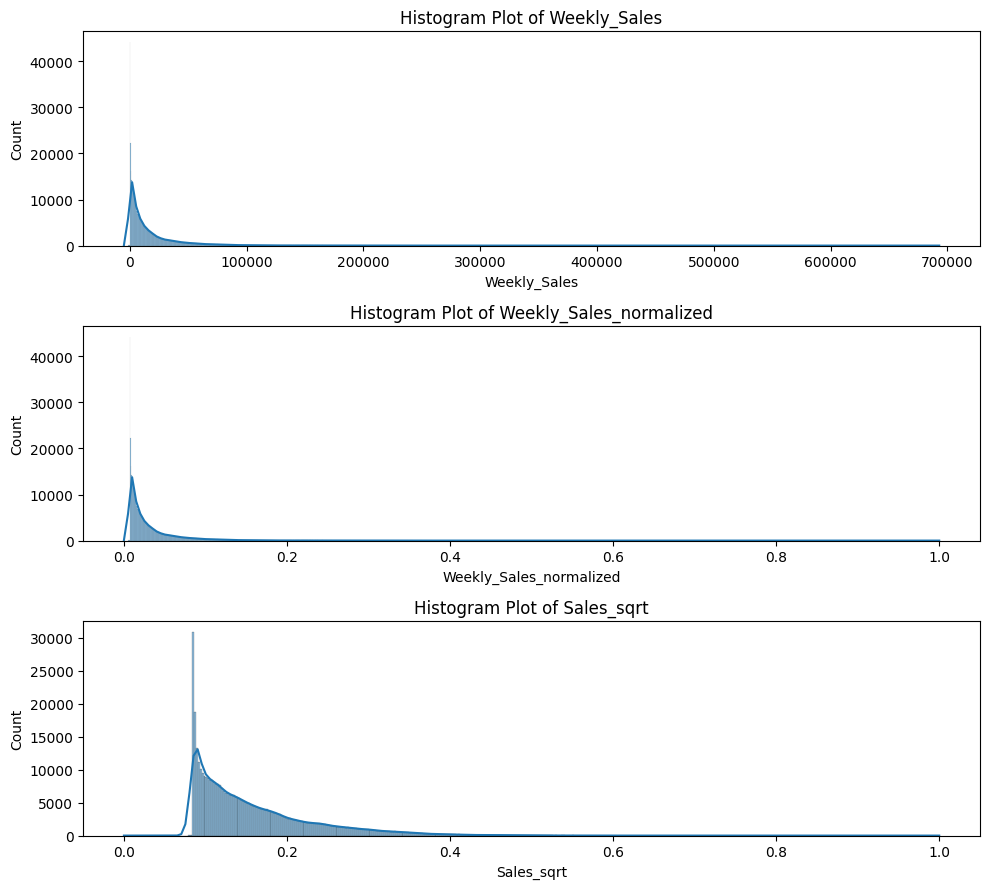

In [ ]:
# Calculate the number of rows and columns needed
features=['Weekly_Sales','Weekly_Sales_normalized','Sales_sqrt']
num_features = len(features)
num_rows = num_features // 2
num_cols = 2 if num_features % 2 == 0 else 3  # Adjust for odd number of features

# Set up subplots
fig, axes = plt.subplots(nrows=num_cols, ncols=num_rows, figsize=(10, 9))

# Flatten the axes array if needed
if num_cols > 1:
    axes = axes.flatten()

# Iterate over each feature and create a histogram plot on its respective subplot
for i, feature in enumerate(features):
    sns.histplot(data=final_df, x=feature,kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram Plot of {feature}')
    axes[i].set_xlabel(feature)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# **Anomaly Detection in Sales Data:**

* Identify unusual sales patterns across stores and departments.
* Investigate potential causes (e.g., holidays, markdowns, economic indicators).
* Implement anomaly handling strategies to clean the data for further analysis.

**Mitigation Strategies**

There are a number of strategies that can be used to mitigate the impact of anomalies without removing the data points. These strategies include:
* **Data cleaning:** This involves identifying and correcting errors in the data. This can be done manually or using automated tools.
* **Data normalization:** This involves transforming the data so that it is distributed normally. This can help to identify anomalies more easily.
* **Data imputation:** This involves filling in missing data points. This can be done using statistical methods or machine learning algorithms.

##**Anamolay Detection in Weekly Sales**

Approaches:

**Descriptive Statistics**



### **Descriptive Statistics📈📉:**

Descriptive statistics are among the foundational methods for anomaly detection in retail.

Techniques like mean, median, and standard deviation can be used to calculate summary statistics, which help identify point anomalies.


In [ ]:
import numpy as np

# Calculate mean and standard deviation
mean_sales = np.mean(final_df['Sales_sqrt'])
std_deviation = np.std(final_df['Sales_sqrt'])

# Set a threshold for flagging anomalies (e.g., 3 standard deviations from the mean)
threshold = mean_sales + 3 * std_deviation

# Identify anomalies
anomalies = [data_point for data_point in final_df['Sales_sqrt'] if data_point > threshold]

#If the data point exceeds the threshold, it assigns a value of 1 (indicating an anomaly), otherwise it assigns a value of 0.
final_df['Anomaly'] = [1 if data_point > threshold else 0 for data_point in final_df['Sales_sqrt']]

print("Retail Weekly Sales Data:")
print("Mean Sales:", mean_sales)
print("Standard Deviation:", std_deviation)
print("Anomalies (2 standard deviations from the mean)-Total number of Anomalies in Weekly Sales :", len(anomalies))
print("Total number of Anomalies in Weekly Sales (percentage-wise) :", round((len(anomalies)/len(sales_df))*100,2))

Retail Weekly Sales Data:
Mean Sales: 0.1569383540371942
Standard Deviation: 0.07355145612450474
Anomalies (2 standard deviations from the mean)-Total number of Anomalies in Weekly Sales : 6155
Total number of Anomalies in Weekly Sales (percentage-wise) : 1.46


In [ ]:
final_df['Anomaly'].value_counts()

,count
Anomaly,
0,415415
1,6155


In [ ]:
df_anomalies=final_df[(final_df['Anomaly']==1)].reset_index(drop=True)
df_anomalies.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales_normalized,Sales_sqrt,Anomaly
0,1,7,2010-12-17,96198.12,False,A,151315,49.84,2.869,5347.45,192.00,24.6,1481.31,3359.45,211.405312,7.838,0.144949,0.380721,1
1,1,7,2010-12-24,166697.72,False,A,151315,52.33,2.886,5347.45,192.00,24.6,1481.31,3359.45,211.405122,7.838,0.245938,0.495922,1
2,1,7,2011-12-23,119302.15,False,A,151315,47.96,3.112,2725.36,40.48,634.7,24.90,2739.43,219.357722,7.866,0.178045,0.421954,1
3,1,38,2010-05-02,115564.35,False,A,151315,42.31,2.572,5347.45,192.00,24.6,1481.31,3359.45,211.096358,8.106,0.172691,0.415561,1
4,1,38,2010-02-19,98672.59,False,A,151315,39.93,2.514,5347.45,192.00,24.6,1481.31,3359.45,211.289143,8.106,0.148493,0.385348,1


###**Visualization**

In [ ]:
final_df.head(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales_normalized,Sales_sqrt,Anomaly
0,1,1,2010-05-02,24924.5,False,A,151315,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,0.042851,0.207004,0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the features and plot types
features = {
  'Size': 'scatter',
  'CPI': 'scatter',
  'Unemployment': 'scatter',
  'Fuel_Price': 'scatter',
  'Temperature': 'scatter',
  'Date': 'line',
}

# Calculate number of rows and columns
num_features = len(features)
ncols = 2
nrows = (num_features + ncols - 1) // ncols  # Ensure enough rows

# Set up subplots with 2 graphs per row
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 10))
axes = axes.flatten()

# Iterate over each feature and plot accordingly
for i, (feature, plot_type) in enumerate(features.items()):
    if plot_type == 'scatter':
        sns.scatterplot(x=feature, y='Sales_sqrt', hue='Anomaly', data=final_df, ax=axes[i])
    elif plot_type == 'line':
        sns.lineplot(x=feature, y='Sales_sqrt', hue='Anomaly', data=final_df, ax=axes[i])
    elif plot_type == 'bar':
        sns.barplot(x=feature, y='Sales_sqrt', hue='Anomaly', data=final_df, ax=axes[i])

    axes[i].set_title(f'{feature}-wise Weekly Sales Anomalies')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Weekly Sales')

    # Optional: Add data labels to bar plots
    if plot_type == 'bar':
        for p in axes[i].patches:
            axes[i].annotate(format(p.get_height(), '.2f'),
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center',
                             xytext=(0, 10),
                             textcoords='offset points')

# Remove any empty subplots
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


**Findings of Potential Causes of Anomalies:**

**Impact of Holidays on Sales:**

It appears that holidays have a significant impact on sales. When isholiday is False (indicating regular days), 90% of the data is inclined towards lower sales values, which suggests that sales are generally lower on non-holiday days. Conversely, during holidays (isholiday is True), the anomaly data shows higher sales values. This indicates that sales tend to increase during holiday periods.

**Seasonality and Consumer Behavior:**

The increase in sales during holidays could be attributed to various factors such as increased consumer spending, promotional events, seasonal discounts, and changes in consumer behavior during festive periods. Customers may be more likely to make purchases during holidays, leading to higher sales volumes.

**Business Strategies:**

Businesses often implement specific marketing and sales strategies during holiday seasons to capitalize on increased consumer demand. This may include running special promotions, advertising campaigns, or offering holiday-themed products, all of which can contribute to higher sales during holidays.

**Anomaly Detection:**

The observation that anomalies occur more frequently during holiday periods suggests that sales behavior during holidays may be less predictable or exhibit greater variability compared to regular days. Detecting and understanding these anomalies can help businesses adapt their strategies to optimize sales performance during different periods.

Overall, the conclusions drawn from the data highlight the importance of considering holidays and seasonal factors in sales forecasting, marketing strategies, and business planning. Adjusting business operations and marketing efforts to align with consumer behavior during holiday periods can help businesses maximize sales opportunities and drive growth.

##**Handling Anomalies in Weekly Sales**

In [ ]:
final_df.head(1)

In [ ]:
#Anamoly detection
from sklearn.ensemble import IsolationForest
#checking for normal distribution
print("Skewness - Cost: %f" % final_df['Weekly_Sales'].skew())
print("Kurtosis - Cost: %f" % final_df['Weekly_Sales'].kurt())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up subplots with 3 plots in one row
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))  # Width = 24, Height = 8

# Plot 1: Scatter plot of Weekly Sales distribution
axes[0].scatter(range(final_df.shape[0]), np.sort(final_df['Weekly_Sales'].values))
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Weekly_Sales')
axes[0].set_title("Weekly_Sales Distribution")
sns.despine(ax=axes[0])

# Plot 2: Distribution plot of Weekly Sales
sns.histplot(final_df['Weekly_Sales'], kde=True, ax=axes[1])  # Updated to sns.histplot
axes[1].set_title("Distribution of Weekly Sales")
sns.despine(ax=axes[1])

# Plot 3: Distribution plot of sqrt transformed Weekly Sales
sns.histplot(final_df['Sales_sqrt'], kde=True, ax=axes[2])  # Updated to sns.histplot
axes[2].set_title("Distribution of Weekly Sales (sqrt transformed)")
sns.despine(ax=axes[2])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#isolation forest for anamoly detection on Weekly Sales
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(final_df['Weekly_Sales'].values.reshape(-1, 1))
final_df['anomaly_score_univariate_Weekly_Sales'] = isolation_forest.decision_function(final_df['Weekly_Sales'].values.reshape(-1, 1))
final_df['outlier_univariate_Weekly_Sales'] = isolation_forest.predict(final_df['Weekly_Sales'].values.reshape(-1, 1))


In [ ]:
#chart to visualize outliers
xx = np.linspace(final_df['Weekly_Sales'].min(), final_df['Weekly_Sales'].max(), len(final_df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Weekly Sales')
plt.show();

In [ ]:
# Handling Outliers & Outlier treatments
# To separate the symmetric distributed features and skew symmetric distributed features
num_columns=['Weekly_Sales', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment']
symmetric_feature=[]
non_symmetric_feature=[]
for i in num_columns:
  if abs(final_df[i].mean()-final_df[i].median())< 0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

In [ ]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)- 1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+ 1.5*IQR
  # print(f'upper : {upper_bridge} lower : {lower_bridge}')
  return upper_bridge,lower_bridge

In [ ]:
final_df.shape

In [ ]:
# Get the upper and lower boundaries for 'Weekly_Sales'
upper_boundary, lower_boundary = outlier_treatment_skew(final_df, 'Weekly_Sales')
upper_boundary, lower_boundary

In [ ]:
#Removing Anomalies using IQR
final_new_df=final_df[(final_df['Weekly_Sales'] >= lower_boundary) & (final_df['Weekly_Sales'] <= upper_boundary)]

In [ ]:
#dropping the columns created while outliers treatment
final_new_df.drop(columns =['anomaly_score_univariate_Weekly_Sales','outlier_univariate_Weekly_Sales'], inplace = True)

In [ ]:
import numpy as np

# Calculate mean and standard deviation
mean_sales = np.mean(final_new_df['Sales_sqrt'])
std_deviation = np.std(final_new_df['Sales_sqrt'])

# Set a threshold for flagging anomalies (e.g., 3 standard deviations from the mean)
threshold = mean_sales + 3 * std_deviation

# Identify anomalies
anomalies = [data_point for data_point in final_new_df['Sales_sqrt'] if data_point > threshold]

#If the data point exceeds the threshold, it assigns a value of 1 (indicating an anomaly), otherwise it assigns a value of 0.
final_df['Anomaly'] = [1 if data_point > threshold else 0 for data_point in final_df['Sales_sqrt']]

print("Retail Weekly Sales Data:")
print("Mean Sales:", mean_sales)
print("Standard Deviation:", std_deviation)
print("Anomalies (2 standard deviations from the mean)-Total number of Anomalies in Weekly Sales :", len(anomalies))
print("Total number of Anomalies in Weekly Sales (percentage-wise) :", round((len(anomalies)/len(sales_df))*100,2))

# **Time-Based Anomaly Detection:**
- Analyze sales trends over time.
- Detect seasonal variations and holiday effects on sales.
- Use time-series analysis for understanding store and department performance over time.
- Detect anomalies in time series Sales data using specialized methods.

💡 Approach:

📊 Create Rolling Statistics: Calculate rolling averages, moving sums, and standard deviations to track data variations over time.

🔄 Apply Exponential Smoothing: Use exponential moving averages (EMA) and anomaly detection techniques to highlight unusual patterns in time series data.

🚨 Highlight Anomalies: Set thresholds and visual cues to identify significant deviations from smoothed values, aiding in anomaly detection and trend analysis.

###**Rolling Statistics**

Rolling statistics are a data analysis tool that can be used to identify outliers and trends in sequential and time-series data. They work by continuously recalculating statistical measures over a rolling window, which can help uncover anomalies and deviations that might not be obvious using traditional methods.

In [ ]:
# Sort the DataFrame by date
final_df.sort_values(by='Date', inplace=True)

In [ ]:
# Calculate rolling statistics
rolling_window = 30
# Rolling average of TotalSales
final_df['RollingAvgTotalSales'] = final_df['Weekly_Sales'].rolling(window=rolling_window).mean()

# Set anomaly threshold (customize this threshold as needed)
sales_threshold = 1  # Adjust the threshold as needed

# Detect anomalies in WeeklySales
final_df['SalesAnomaly'] = final_df['Weekly_Sales'] < sales_threshold * final_df['RollingAvgTotalSales']

In [ ]:
# Visualize rolling statistics with original values and anomalies
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=final_df, label='Weekly Sales')
sns.lineplot(x='Date', y='RollingAvgTotalSales', data=final_df, label='Rolling Avg Weekly Sales')
sns.lineplot(x='Date', y='Weekly_Sales', data=final_df[final_df['SalesAnomaly']], c='green', label='Sales Anomalies')

plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.title('Rolling Statistics with Anomalies for Sales Data')
plt.show()

**Observations:**
* The graph shows the rolling statistics with anomalies for sales data.
* The rolling average of sales does not show steadily increasing or decreasing over time, indicating that overall sales are trending constant.
* There are a few anomalies in the sales data, as indicated by the green dots on the graph. These anomalies could be caused by a variety of factors, such as markdown events, seasonal fluctuations, or holidays.




###**EWMA**

In [ ]:
# Apply exponential smoothing (EMA)
alpha = 0.2  # Adjust the smoothing factor as needed

# Exponential smoothing of TotalSales
final_df['EMAWeeklySales'] = final_df['Weekly_Sales'].ewm(alpha=alpha).mean()

# Set anomaly threshold (customize this threshold as needed)
sales_threshold = 1  # Adjust the threshold as needed

# Detect anomalies in TotalSales and Discount
final_df['SalesAnomaly_EMA'] = final_df['Weekly_Sales'] < sales_threshold * final_df['EMAWeeklySales']

In [ ]:
# Visualize EMA with original values and anomalies
plt.figure(figsize=(12, 6))
# plt.plot(final_df['Date'], final_df['Weekly_Sales'], label='Weekly_Sales')
# plt.plot(final_df['Date'], final_df['EMAWeeklySales'], label='EMA of Weekly Sales', linestyle='--')
# plt.scatter(final_df['Date'][final_df['SalesAnomaly_EMA']], final_df['Weekly_Sales'][final_df['SalesAnomaly_EMA']], c='green', label='Sales Anomalies')

sns.lineplot(x='Date', y='Weekly_Sales', data=final_df, label='Weekly Sales')
sns.lineplot(x='Date', y='EMAWeeklySales', data=final_df, label='EMA of Weekly Sales')
sns.lineplot(x='Date', y='Weekly_Sales', data=final_df[final_df['SalesAnomaly_EMA']], c='green', label='Sales Anomalies')

plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.title('Exponential Weighted Moving Averages with Anomalies for Weekly Sales Data')
plt.show()

**Observations:**

The exponential weighted moving average (EWMA) of Amazon sales data has been  nearly steady with a few unexpected spikes over time, indicating that overall sales are trending constant with a few seasonal fluctuations.

There are a few anomalies in the sales data, as indicated by the green dots on the graph. These anomalies could be caused by a variety of factors, such as special holidays, seasonal fluctuations, or unexpected events.



# **Customer Segmentation Analysis:**

* Segment stores or departments based on sales patterns, markdowns, and regional features.
* Analyze segment-specific trends and characteristics.

In [ ]:
cluster_df=final_new_df.copy()

In [ ]:
cluster_df.head()

In [ ]:
# Getting symmetric and skew symmetric features from the columns
features = ['Weekly_Sales', 'MarkDown1', 'MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Size','Fuel_Price','Temperature']
symmetric_feature=[]
non_symmetric_feature=[]
for i in features:
  if abs(cluster_df[i].mean()-cluster_df[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

In [ ]:
# Step 2: Normalize Sales Data (Standardization)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols=['Weekly_Sales', 'MarkDown1', 'MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Size','Temperature','Unemployment', 'Fuel_Price']
# Reshape the column to a 2D array and apply min-max scaling
for i in cols:
  cluster_df[i +'_normalized'] = scaler.fit_transform(cluster_df[i].values.reshape(-1, 1))

In [ ]:
cluster_df.columns

In [ ]:
#using log transformation to transform Weekly_Sales as using capping tends to change median and mean
cols=['Weekly_Sales_normalized','MarkDown1_normalized', 'MarkDown2_normalized', 'MarkDown3_normalized',
       'MarkDown4_normalized', 'MarkDown5_normalized', 'CPI_normalized',
       'Size_normalized', 'Temperature_normalized']
for i in cols:
  cluster_df[i+' sqrt'] = cluster_df[i].apply(lambda x: x ** 0.5)

In [ ]:
cluster_df.head()

In [ ]:
cluster_df.columns

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to visualize
cols = ['Fuel_Price_normalized','Unemployment_normalized','Weekly_Sales_normalized sqrt', 'MarkDown1_normalized sqrt',
       'MarkDown2_normalized sqrt', 'MarkDown3_normalized sqrt',
       'MarkDown4_normalized sqrt', 'MarkDown5_normalized sqrt',
       'CPI_normalized sqrt', 'Size_normalized sqrt',
       'Temperature_normalized sqrt']

# Number of columns and rows for the grid
n_cols = 3  # Number of columns in the grid
n_rows = (len(cols) + n_cols - 1) // n_cols  # Calculate number of rows

# Set up subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot the distributions
for ax, col in zip(axes, cols):
    sns.histplot(cluster_df[col], kde=True, ax=ax)  # Using histplot as distplot is deprecated
    ax.set_title("Square-root-Transformed " + col + " Distribution")
    sns.despine(ax=ax)

# Remove any empty subplots
for i in range(len(cols), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Define the aggregation functions and rename columns
agg_functions = {
    'Weekly_Sales_normalized sqrt': 'mean',
    'MarkDown1_normalized sqrt': 'mean',
    'MarkDown2_normalized sqrt': 'mean',
    'MarkDown3_normalized sqrt': 'mean',
    'MarkDown4_normalized sqrt': 'mean',
    'MarkDown5_normalized sqrt': 'mean',
    'CPI_normalized sqrt': 'mean',
    'Size_normalized sqrt': 'mean',
    'Temperature_normalized sqrt': 'mean'
}

# Calculate the mean for each column grouped by 'Store' and rename columns
mean_by_store = cluster_df.groupby('Store').agg(agg_functions).reset_index()

# Rename columns
mean_by_store.columns = ['Store', 'Mean_Weekly_Sales', 'Mean_MarkDown1', 'Mean_MarkDown2',
                         'Mean_MarkDown3', 'Mean_MarkDown4', 'Mean_MarkDown5',
                         'Mean_CPI', 'Mean_Size', 'Mean_Temperature']
store_df = pd.DataFrame(mean_by_store.set_index('Store'))
store_df.head()

In [ ]:
store_df.columns

###**Dimensionality Reduction using PCA**

In [ ]:
# Dimensionality Reduction (If needed)
#applying pca
#setting restaurant feature as index as it still had categorial value
from sklearn.decomposition import PCA
#scaled_df.set_index(['Store'],inplace=True)
features = store_df.columns
# features = features.drop('Restaurant')
# create an instance of PCA
pca = PCA()

# fit PCA on features
pca.fit(store_df[features])

In [ ]:
#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'orange')
plt.xlabel('number of components',size = 15, color = 'red')
plt.ylabel('cumulative explained variance',size = 14, color = 'blue')
plt.title('Variance v/s No. of Components',size = 20, color = 'green')
plt.xlim([0, 8])
plt.show()

In [ ]:
#using n_component as 3
pca = PCA(n_components=3)

# fit PCA on features
pca.fit(store_df[features])

# explained variance ratio of each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))

# transform data to principal component space
df_pca = pca.transform(store_df[features])

In [ ]:
#shape
print("original shape: ", store_df.shape)
print("transformed shape:", df_pca.shape)

###**Kmeans Clustering**

In [ ]:
# ML Model - 1 Implementation
#importing kmeans
from sklearn.cluster import KMeans

In [ ]:
#Within Cluster Sum of Squared Errors(WCSS) for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(df_pca)
    wcss.append(km.inertia_)

In [ ]:
#elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()

# **Segmentation Quality Evaluation:**

Evaluate the effectiveness of the customer segmentation.

Use metrics to assess the quality of segments in terms of homogeneity and separation.

## **Silhouette score**

In [ ]:
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
import matplotlib.cm as cm

# candidates for the number of cluster
parameters = list(range(2,7))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
#visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)
    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')
    # Set markers for cluster centers
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='${}$'.format(i), alpha=1,
                s=50, edgecolor='k')

    ax2.set_title("Visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')


    #ax2.set_title("visualization of the clustered data.")
    #ax2.set_xlabel("Feature space for the 1st feature")
    #ax2.set_ylabel("Feature space for the 2nd feature")


## **Department Wise Clustering**

In [ ]:
# Define the aggregation functions and rename columns
agg_functions = {
    'Weekly_Sales_normalized sqrt': 'mean',
    'MarkDown1_normalized sqrt': 'mean',
    'MarkDown2_normalized sqrt': 'mean',
    'MarkDown3_normalized sqrt': 'mean',
    'MarkDown4_normalized sqrt': 'mean',
    'MarkDown5_normalized sqrt': 'mean',
    'CPI_normalized sqrt': 'mean',
    'Size_normalized sqrt': 'mean',
    'Temperature_normalized sqrt': 'mean'
}

# Calculate the mean for each column grouped by 'Store' and rename columns
mean_by_dept = cluster_df.groupby('Dept').agg(agg_functions).reset_index()

# Rename columns
mean_by_dept.columns = ['Dept', 'Mean_Weekly_Sales', 'Mean_MarkDown1', 'Mean_MarkDown2',
                         'Mean_MarkDown3', 'Mean_MarkDown4', 'Mean_MarkDown5',
                         'Mean_CPI', 'Mean_Size', 'Mean_Temperature']
dept_df = pd.DataFrame(mean_by_dept.set_index('Dept'))
dept_df.head()

In [ ]:
# Dimensionality Reduction (If needed)
#applying pca
#setting restaurant feature as index as it still had categorial value
from sklearn.decomposition import PCA
#scaled_df.set_index(['Store'],inplace=True)
features = dept_df.columns
# features = features.drop('Restaurant')
# create an instance of PCA
pca = PCA()

# fit PCA on features
pca.fit(dept_df[features])

In [ ]:
#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'orange')
plt.xlabel('number of components',size = 15, color = 'red')
plt.ylabel('cumulative explained variance',size = 14, color = 'blue')
plt.title('Variance v/s No. of Components',size = 20, color = 'green')
plt.xlim([0, 8])
plt.show()

In [ ]:
#using n_component as 3
pca = PCA(n_components=3)

# fit PCA on features
pca.fit(dept_df[features])

# explained variance ratio of each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))

# transform data to principal component space
df_pca1 = pca.transform(dept_df[features])

In [ ]:
#shape
print("original shape: ", dept_df.shape)
print("transformed shape:", df_pca1.shape)

In [ ]:
#Within Cluster Sum of Squared Errors(WCSS) for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(df_pca1)
    wcss.append(km.inertia_)

In [ ]:
#elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()

In [ ]:
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
import matplotlib.cm as cm

# candidates for the number of cluster
parameters = list(range(2,10))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
#visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca1) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca1)
    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca1[:, 0], df_pca1[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')
    # Set markers for cluster centers
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='${}$'.format(i), alpha=1,
                s=50, edgecolor='k')

    ax2.set_title("Visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

# **Personalization Strategies:**

Develop personalized marketing strategies based on the store and department segments.

Propose inventory management strategies tailored to store and department needs.



## **Store Segmentation Analysis**

### **Store Segmentation**

In [ ]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 80)

kmeans= KMeans(n_clusters = 4, init= 'k-means++', random_state = 42)
kmeans.fit(df_pca)

#predict the labels of clusters.
label = kmeans.fit_predict(df_pca)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
#making df for pca
kmeans_pca_df = pd.DataFrame(df_pca,columns=['PC1','PC2','PC3'],index=store_df.index)
kmeans_pca_df["label"] = label
kmeans_pca_df.sample(5).sort_index(ascending=True)

In [ ]:
# Encode your categorical columns

#categorial encoding using pd.getdummies
#new df with important categories
cluster_dummy = cluster_df[['Store','Type']]

#using get dummies to get dummies for cuisines
cluster_dummy = pd.get_dummies(cluster_dummy, columns=["Type"], prefix=["Type"])

#checking if the values are correct
# cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].eq(1)[:5].T
cluster_dummy = cluster_dummy.groupby("Store").sum().reset_index()

In [ ]:
cluster_dummy.set_index(['Store'],inplace=True)

In [ ]:
#joining the cluster labels to names dataframe
cluster_dummy = cluster_dummy.join(store_df[['Mean_Weekly_Sales', 'Mean_MarkDown1', 'Mean_MarkDown2',
       'Mean_MarkDown3', 'Mean_MarkDown4', 'Mean_MarkDown5', 'Mean_CPI',
       'Mean_Size', 'Mean_Temperature']])
cluster_dummy.sample(2)

In [ ]:
cluster_dummy = cluster_dummy.join(kmeans_pca_df['label'])
cluster_dummy.sample(2)

In [ ]:
#creating df to store cluster data
clustering_result = cluster_dummy.copy().reset_index()
clustering_result.head()

In [ ]:
clustering_result.groupby('label').agg({'Store': 'count'})

In [ ]:
#printing store list for each cluster
for cluster in clustering_result['label'].unique().tolist():
  print('Store List for Cluster :', cluster,'\n')
  print(clustering_result[clustering_result["label"]== cluster]['Store'].unique(),'\n')
  print('='*120)

In [ ]:
import matplotlib.pyplot as plt

# Define lists to store cluster labels and corresponding store counts
cluster_labels = []
store_counts = []

# Iterate over unique cluster labels
for cluster in clustering_result['label'].unique().tolist():
    # Filter dataframe by cluster label and retrieve unique store lists
    stores = clustering_result[clustering_result["label"] == cluster]['Store'].unique()

    # Append cluster label and store count to lists
    cluster_labels.append(cluster)
    store_counts.append(len(stores))

# Plot the store count for each cluster
plt.figure(figsize=(10, 6))
plt.bar(cluster_labels, store_counts, color='skyblue')
plt.xlabel('Cluster Label')
plt.ylabel('Store Count')
plt.title('Store Count for Each Cluster')
plt.xticks(cluster_labels)
plt.grid(axis='y')
plt.show()

In [ ]:
# Define the aggregation functions and rename columns
agg_functions = {
    'Weekly_Sales': 'mean',
    'MarkDown1': 'mean',
    'MarkDown2': 'mean',
    'MarkDown3': 'mean',
    'MarkDown4': 'mean',
    'MarkDown5': 'mean',
    'CPI': 'mean',
    'Size': 'mean',
    'Temperature': 'mean'
}

# Calculate the mean for each column grouped by 'Store' and rename columns
mean_by_store1 = cluster_df.groupby('Store').agg(agg_functions).reset_index()

# Rename columns
mean_by_store1.columns = ['Store', 'Mean_Weekly_Sales', 'Mean_MarkDown1', 'Mean_MarkDown2',
                         'Mean_MarkDown3', 'Mean_MarkDown4', 'Mean_MarkDown5',
                         'Mean_CPI', 'Mean_Size', 'Mean_Temperature']
store1_df = pd.DataFrame(mean_by_store1.set_index('Store'))
store1_df.head()

In [ ]:
cluster_new_dummy = store1_df.join(cluster_dummy['label'])
cluster_new_dummy.sample(2)

In [ ]:
#printing Mean Weekly Sales list for each cluster
for cluster in cluster_new_dummy['label'].unique().tolist():
  print('Mean Weekly Sales List for Cluster :', cluster,'\n')
  print(cluster_new_dummy[cluster_new_dummy["label"]== cluster]['Mean_Weekly_Sales'].mean(),'\n')
  print('='*120)

In [ ]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharex=True)

# Define lists to store cluster labels and corresponding mean values
cluster_labels = cluster_new_dummy['label'].unique().tolist()

# Plot 1: Mean Weekly Sales for Each Cluster
mean_sales = [cluster_new_dummy[cluster_new_dummy["label"] == cluster]['Mean_Weekly_Sales'].mean() for cluster in cluster_labels]
axes[0].bar(cluster_labels, mean_sales, color='skyblue')
axes[0].set_ylabel('Mean Weekly Sales')
axes[0].set_title('Mean Weekly Sales for Each Cluster')
axes[0].grid(axis='y')

# Plot 2: Mean Consumer Price Index (CPI) for Each Cluster
mean_cpi = [cluster_new_dummy[cluster_new_dummy["label"] == cluster]['Mean_CPI'].mean() for cluster in cluster_labels]
axes[1].bar(cluster_labels, mean_cpi, color='lightgreen')
axes[1].set_ylabel('Mean Consumer Price Index')
axes[1].set_title('Mean Consumer Price Index for Each Cluster')
axes[1].grid(axis='y')

# Plot 3: Mean Store Size for Each Cluster
mean_store_size = [cluster_new_dummy[cluster_new_dummy["label"] == cluster]['Mean_Size'].mean() for cluster in cluster_labels]
axes[2].bar(cluster_labels, mean_store_size, color='lightcoral')
axes[2].set_xlabel('Cluster Label')
axes[2].set_ylabel('Mean Store Size')
axes[2].set_title('Mean Store Size for Each Cluster')
axes[2].grid(axis='y')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### **Inferences from Store Segmentation Analysis**


 **Cluster 0: Premium Space Retailers & Sizeable Luxury Stores**

 This cluster consists of stores known for their larger physical footprint and is distinguished by having the highest mean consumer price index among the clusters. The average weekly sales in Cluster 0 stores total 11848, with a total of 15 stores belonging to this group. This cluster can be defined as comprising stores with significant physical space and catering to consumers with higher-priced products.


**Cluster 1: Value-Oriented Stores**

This cluster represents stores with an average weekly sales totaling 11851, with 18 stores in total. It ranks as the second-largest cluster in terms of store sizes and is notable for having the lowest mean consumer price index. Described as comprising stores with medium physical space, it caters to consumers seeking lower-priced products while offering value-oriented shopping experiences.

**Cluster 2: Budget-Friendly Stores**

This cluster represents stores characterized by their lowest average weekly sales, totaling 6362. These stores are notable for their small physical footprint and have the lowest mean consumer price index among the clusters. With a total of 4 stores in this group, it can be defined as comprising stores catering to consumers seeking lower-priced products in compact retail spaces.

**Cluster 3: Compact Elegance Stores**

This cluster encompasses stores known for their smaller physical dimensions and stands out for having a higher mean consumer price index compared to other clusters. The average weekly sales in Cluster 3 stores total 6579, which is relatively lower, with a total of 8 stores belonging to this group.

### **Personalized Marketing Strategies for Store Segments :**

**Cluster 0: Premium Space Retailers & Sizeable Luxury Stores**
* Marketing campaigns should highlight the spaciousness and luxury ambiance of the stores.
* Emphasize premium product lines and exclusive offerings to attract affluent customers.
* Collaborate with high-end brands for co-marketing opportunities to reinforce the store's upscale image.

**Cluster 1: Value-Oriented Stores**
* Focus marketing efforts on value-conscious consumers by highlighting competitive pricing and promotions.
* Leverage social media platforms and targeted digital advertising to reach budget-conscious shoppers.
* Offer loyalty programs and discounts to incentivize repeat purchases and foster customer loyalty.

**Cluster 2: Budget-Friendly Stores**
* Promote budget-friendly product lines and emphasize affordability in marketing messaging.
* Utilize cost-effective marketing channels such as email campaigns and local advertising.
* Highlight deals, discounts, and clearance sales to attract price-sensitive customers.

**Cluster 3: Compact Elegance Stores**
* Position the stores as boutique destinations offering curated selections of premium products.
* Highlight the elegance and sophistication of the store ambiance in marketing materials.
* Target niche market segments such as urban professionals or luxury enthusiasts through personalized outreach and experiential marketing events.

### **Inventory Management Strategies for Store Segments:**

**Cluster 0: Premium Space Retailers & Sizeable Luxury Stores**

Maintain a diverse inventory of high-end products to cater to affluent clientele.

Implement demand forecasting techniques to ensure adequate stock levels of luxury items.

Regularly refresh merchandise to align with changing consumer preferences and trends.

**Cluster 1: Value-Oriented Stores**

Optimize inventory turnover by stocking popular and fast-selling items.

Utilize just-in-time inventory management to minimize excess inventory and reduce storage costs.

Monitor competitor pricing and adjust inventory levels to remain competitive in the value segment.

**Cluster 2: Budget-Friendly Stores**

Focus on lean inventory management practices to minimize carrying costs.

Prioritize stocking essential and high-demand items to maximize sales per square foot.

Negotiate favorable terms with suppliers to secure competitive pricing and maintain margins.

**Cluster 3: Compact Elegance Stores**

Curate a carefully selected inventory of premium products tailored to the tastes of discerning customers.

Implement inventory tracking systems to monitor stock levels and prevent stockouts of high-demand items.

Offer personalized shopping experiences and concierge services to enhance the perceived value of the store's offerings.

##**Department Segmentation Analysis**

### **Department Segmentation**

In [ ]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 80)

kmeans= KMeans(n_clusters = 4, init= 'k-means++', random_state = 42)
kmeans.fit(df_pca1)

#predict the labels of clusters.
label = kmeans.fit_predict(df_pca1)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(df_pca1[label == i , 0] , df_pca1[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
#making df for pca
kmeans_pca_df1 = pd.DataFrame(df_pca1,columns=['PC1','PC2','PC3'],index=dept_df.index)
kmeans_pca_df1["label"] = label
kmeans_pca_df1.sample(5).sort_index(ascending=True)

In [ ]:
# Encode your categorical columns

#categorial encoding using pd.getdummies
#new df with important categories
cluster_dummy1 = cluster_df[['Dept','Type']]

#using get dummies to get dummies for cuisines
cluster_dummy1 = pd.get_dummies(cluster_dummy1, columns=["Type"], prefix=["Type"])

#checking if the values are correct
# cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].eq(1)[:5].T
cluster_dummy1 = cluster_dummy1.groupby("Dept").sum().reset_index()
cluster_dummy1.head()

In [ ]:
cluster_dummy1.set_index(['Dept'],inplace=True)

In [ ]:
#joining the cluster labels to names dataframe
cluster_dummy1 = cluster_dummy1.join(dept_df[['Mean_Weekly_Sales', 'Mean_MarkDown1', 'Mean_MarkDown2',
       'Mean_MarkDown3', 'Mean_MarkDown4', 'Mean_MarkDown5', 'Mean_CPI',
       'Mean_Size', 'Mean_Temperature']])
cluster_dummy1.sample(2)

In [ ]:
cluster_dummy1 = cluster_dummy1.join(kmeans_pca_df1['label'])
cluster_dummy1.sample(2)

In [ ]:
#creating df to store cluster data
clustering_result1 = cluster_dummy1.copy().reset_index()
clustering_result1.head()

In [ ]:
clustering_result1.groupby('label').agg({'Dept': 'count'})

In [ ]:
#printing store list for each cluster
for cluster in clustering_result1['label'].unique().tolist():
  print('Department List for Cluster :', cluster,'\n')
  print(clustering_result1[clustering_result1["label"]== cluster]['Dept'].unique(),'\n')
  print('='*120)

In [ ]:
import matplotlib.pyplot as plt

# Define lists to store cluster labels and corresponding store counts
cluster_labels = []
dept_counts = []

# Iterate over unique cluster labels
for cluster in clustering_result1['label'].unique().tolist():
    # Filter dataframe by cluster label and retrieve unique store lists
    dept = clustering_result1[clustering_result1["label"] == cluster]['Dept'].unique()

    # Append cluster label and store count to lists
    cluster_labels.append(cluster)
    dept_counts.append(len(dept))

# Plot the store count for each cluster
plt.figure(figsize=(10, 6))
plt.bar(cluster_labels, dept_counts, color='skyblue')
plt.xlabel('Cluster Label')
plt.ylabel('Department Count')
plt.title('Department Count for Each Cluster')
plt.xticks(cluster_labels)
plt.grid(axis='y')
plt.show()

In [ ]:
# Define the aggregation functions and rename columns
agg_functions = {
    'Weekly_Sales': 'mean',
    'MarkDown1': 'mean',
    'MarkDown2': 'mean',
    'MarkDown3': 'mean',
    'MarkDown4': 'mean',
    'MarkDown5': 'mean',
    'CPI': 'mean',
    'Size': 'mean',
    'Temperature': 'mean'
}

# Calculate the mean for each column grouped by 'Store' and rename columns
mean_by_dept1 = cluster_df.groupby('Dept').agg(agg_functions).reset_index()

# Rename columns
mean_by_dept1.columns = ['Dept', 'Mean_Weekly_Sales', 'Mean_MarkDown1', 'Mean_MarkDown2',
                         'Mean_MarkDown3', 'Mean_MarkDown4', 'Mean_MarkDown5',
                         'Mean_CPI', 'Mean_Size', 'Mean_Temperature']
dept1_df = pd.DataFrame(mean_by_dept1.set_index('Dept'))
dept1_df.head()

In [ ]:
cluster_new_dummy1 = dept1_df.join(cluster_dummy1['label'])
cluster_new_dummy1.sample(2)

In [ ]:
#printing Mean Weekly Sales list for each cluster
for cluster in cluster_new_dummy1['label'].unique().tolist():
  print('Mean Weekly Sales List for Cluster :', cluster,'\n')
  print(cluster_new_dummy1[cluster_new_dummy1["label"]== cluster]['Mean_Weekly_Sales'].mean(),'\n')
  print('='*120)

In [ ]:
import matplotlib.pyplot as plt

# Define the unique cluster labels
cluster_labels = cluster_new_dummy1['label'].unique().tolist()

# Define lists to store mean values for each metric
mean_cpi = []
mean_store_size = []
mean_weekly_sales = []

# Compute mean values for each metric
for cluster in cluster_labels:
    mean_cpi.append(cluster_new_dummy1[cluster_new_dummy1["label"] == cluster]['Mean_CPI'].mean())
    mean_store_size.append(cluster_new_dummy1[cluster_new_dummy1["label"] == cluster]['Mean_Size'].mean())
    mean_weekly_sales.append(cluster_new_dummy1[cluster_new_dummy1["label"] == cluster]['Mean_Weekly_Sales'].mean())

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharex=True)

# Plot 1: Mean Consumer Price Index (CPI) for Each Cluster
axes[0].bar(cluster_labels, mean_cpi, color='skyblue')
axes[0].set_ylabel('Mean CPI')
axes[0].set_title('Mean Consumer Price Index for Each Cluster')
axes[0].grid(axis='y')

# Plot 2: Mean Store Size for Each Cluster
axes[1].bar(cluster_labels, mean_store_size, color='lightgreen')
axes[1].set_ylabel('Mean Store Size')
axes[1].set_title('Mean Store Size for Each Cluster')
axes[1].grid(axis='y')

# Plot 3: Mean Weekly Sales for Each Cluster
axes[2].bar(cluster_labels, mean_weekly_sales, color='lightcoral')
axes[2].set_xlabel('Cluster Label')
axes[2].set_ylabel('Mean Weekly Sales')
axes[2].set_title('Mean Weekly Sales for Each Cluster')
axes[2].grid(axis='y')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### **Inferences from Department Segmentation Analysis**

**Cluster 0: Sizeable Luxury Departments**
- This department cluster comprises stores characterized by their expansive physical space and stands out for having the highest mean consumer price index among the clusters. The average weekly sales in Department Cluster 0 total 3087, with a total of 42 departments belonging to this group. This cluster can be described as encompassing stores with a substantial number of departments, exhibiting dismal mean weekly sales, and catering to consumers with premium-priced products.

**Cluster 1: Premium Selection Departments**
- This department cluster consists of stores with an average weekly sales totaling 14,643, spread across 27 departments. It is the third-largest cluster in terms of store sizes and is distinguished by having the highest mean consumer price index. Characterized by medium-sized physical spaces, this cluster caters to consumers who prefer higher-priced products.

**Cluster 2: Elite Departments**

- This department cluster consists of departments known for their higher average weekly sales, totaling 26,311. These departments are distinguished by their compact physical footprint and possess the highest mean consumer price index among the clusters. With a total of 11 stores in this group, it can be described as encompassing departments.

**Cluster 3: Grand Outlets Department**

- This department cluster comprises departments recognized for their larger physical size and stands out for having a lower mean consumer price index compared to other clusters. The average weekly sales in Cluster 3 departments total 40,165, which is notably high and represents an outlier, with only 1 department belonging to this group.

### **Personalized Marketing Strategies for Department Segments:**

**Cluster 0: Sizeable Luxury Departments**
- Highlight the spaciousness and luxury ambiance of the departments in marketing materials.
- Promote premium product lines and exclusive offerings to attract affluent customers.
- Utilize targeted advertising and collaborations with high-end brands to reinforce the department's upscale image.

**Cluster 1: Premium Selection Departments**
- Emphasize the quality and exclusivity of products in marketing campaigns to appeal to discerning customers.
- Utilize digital marketing channels and social media platforms to reach a wider audience of luxury shoppers.
- Offer personalized shopping experiences and loyalty programs to enhance customer engagement and loyalty.

**Cluster 2: Elite Departments**
- Position the departments as boutique destinations offering curated selections of premium products.
- Showcase the convenience and efficiency of compact physical spaces in marketing materials.
- Leverage influencer partnerships and experiential marketing events to attract high-value customers.

**Cluster 3: Grand Outlets Department**
- Emphasize the variety and breadth of products available in the departments to appeal to a wider customer base.
- Utilize value-driven marketing messages to highlight affordability and attract price-conscious shoppers.
- Implement omnichannel marketing strategies to drive foot traffic to the department while also capitalizing on online sales opportunities.

### **Inventory Management Strategies for Department Segments:**

**Cluster 0: Sizeable Luxury Departments**
- Maintain a diverse inventory of high-end products to cater to affluent clientele.
- Implement demand forecasting techniques to ensure adequate stock levels of luxury items.
- Regularly refresh merchandise to align with changing consumer preferences and trends.

**Cluster 1: Premium Selection Departments**
- Optimize inventory turnover by stocking popular and high-margin items.
- Utilize just-in-time inventory management to minimize excess inventory and reduce storage costs.
- Monitor competitor pricing and adjust inventory levels to remain competitive in the premium segment.

**Cluster 2: Elite Departments**
- Focus on lean inventory management practices to minimize carrying costs.
- Prioritize stocking essential and high-demand items to maximize sales per square foot.
- Negotiate favorable terms with suppliers to secure competitive pricing and maintain margins.

**Cluster 3: Grand Outlets Department**
- Implement inventory tracking systems to monitor stock levels and prevent stockouts of high-demand items.
- Offer promotions and discounts on slow-moving inventory to stimulate sales and clear excess stock.
- Utilize data analytics to identify trends and forecast demand for seasonal and trending products.

# **Market Basket Analysis:**
* Although individual customer transaction data is not available, infer potential product associations within departments using sales data.
* Develop cross-selling strategies based on these inferences.

**How Does Market Basket Analysis Work?**
* Collect data on customer transactions, such as the items purchased in each transaction, the time and date of the transaction, and any other relevant information.
* Clean and preprocess the data, removing any irrelevant information, handling missing values, and converting the data into a suitable format for analysis.
* Use association rules mining algorithms such as Apriori or FP-Growth to identify frequent item sets, sets of items often appearing together in a transaction.
* Calculate the support and confidence for each frequent itemset, expressing the likelihood of one item being purchased given the purchase of another item.
* Generate association rules based on the frequent itemsets and their corresponding support and confidence values. Association rules indicate the likelihood of purchasing one item given the purchase of another item.
* Interpret the results of the market basket analysis, identifying frequent purchases, assessing the strength of the association between items, and uncovering other relevant insights into customer behavior and preferences.
* Use the insights from the market basket analysis to inform business decisions such as product recommendations, store layout optimization, and targeted marketing campaigns.

**Algorithms Used in Market Basket Analysis**

* There are multiple data mining techniques and algorithms used in Market Basket Analysis. In predicting the probability of items that customers are buying together, one of the important objectives is to achieve accuracy.

  1. Apriori Algorithm
  2. AIS
  3. SETM Algorithm
  4. FP Growth

  We have used Apriori Algorithm to do the Market Basket Analysis

####**Apriori Algorithm**
* The Apriori Algorithm widely uses and is well-known for Association Rule mining, making it a popular choice in market basket analysis.
* AI and SETM algorithms consider it more accurate.
* It helps to find frequent itemsets in transactions and identifies association rules between these items.
* The limitation of the Apriori Algorithm is frequent itemset generation.
* It needs to scan the database many times, leading to increased time and reduced performance as a computationally costly step because of a large dataset.
* It uses the concepts of Confidence and Support.

In [ ]:
!pip install apyori


In [ ]:
import numpy as np
from apyori import apriori

In [ ]:
sales_df['IsHoliday']=sales_df['IsHoliday'].apply(lambda x: 1 if x=='True' else 0)

In [ ]:
relevant_stores = np.array(sales_df['Store'].value_counts().index) # Example list of department numbers to analyze
sales_data_filtered = sales_df[sales_df['Store'].isin(relevant_stores)]
sales_data_filtered.head()

In [ ]:
# Step 2: Creating a DataFrame for Association Rule Mining
# Convert sales data into a transaction format
transactions = sales_data_filtered.groupby(['Date','Dept'])['Store'].apply(list).reset_index(name='Stores')

* Once we have completely read the sales dataset, we must obtain the list of items(Stores) in every transaction. So we are going to run two loops.
* One will be for the total number of transactions, and the other will be for the total number of columns in every transaction.
* The list will work as a training set from where we can generate the list of Association Rules.

In [ ]:
l=[]
for i in range(0,11087):
    l.append([str(transactions.values[i,j]) for j in range(0,3)])

So we are ready with the list of items in our training set, then we need to run the apriori algorithm, which will learn the list of association rules from the training set, i.e., list.

So, we take the minimum support here as 0.011. Now let us see that we have kept 0.8 as the min confidence.We take the minimum lift value as 3, and we consider the minimum length as 2 because we need to find an association among at least two items.

In [ ]:
#applying apriori algorithm
association_rules = apriori(l, min_support=0.011, min_confidence=0.8, min_lift=3, min_length=2)
association_results = list(association_rules)

After running the above line of code, we generated the list of association rules between the items. Now, we want to read the dataset we downloaded from Kaggle.

In [ ]:
for i in range(0, len(association_results)):
    print(association_results[i][0])

Here we are going to display the Rule, Support, and lift ratio for every above association rule by using for loop.

In [ ]:
for item in association_results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    # second index of the inner list
    print("Support: " + str(item[1]))
    # third index of the list located at 0th position
    # of the third index of the inner list
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("-----------------------------------------------------")

we discussed  Market Basket Analysis and learned the steps to implement it from scratch using Python. We then implemented Market Basket Analysis using Apriori Algorithm.

In [ ]:
import pandas as pd

# Create lists to hold the data for each association rule
rules = []
supports = []
confidences = []
lifts = []

# Iterate over the association_results and extract information
for item in association_results:
    rules.append(item[0])
    supports.append(item[1])
    confidences.append(item[2][0][2])
    lifts.append(item[2][0][3])

# Create a DataFrame to display the association results
association_df = pd.DataFrame({
    'Rule': rules,
    'Support': supports,
    'Confidence': confidences,
    'Lift': lifts
})

# Convert frozenset to tuple
association_df['Rule'] = association_df['Rule'].apply(lambda x: tuple(x))

# Splitting the Rule column into Antecedent and Consequent
association_df[['Antecedent', 'Consequent']] = pd.DataFrame(association_df['Rule'].tolist(), index=association_df.index)

# Drop the original Rule column
association_df.drop(columns=['Rule'], inplace=True)

# Reorder columns
association_df = association_df[['Antecedent', 'Consequent', 'Support', 'Confidence', 'Lift']]


In [ ]:
association_df.head().sort_values(by='Confidence',ascending=False).reset_index(drop=True)

In market basket analysis we have tried to find out the association within different departments with the different stores in the given sales data

**Market Basket Analysis Objective:**

The goal is to uncover associations within different departments across different stores using sales data. This entails identifying which departments tend to have items purchased together across stores.

**Features in Sales Data:**

The sales data includes features such as department number, store number, date, weekly sales, and an "is holiday" feature. These features are crucial for analyzing transactional patterns and identifying associations between departments.

**Output:**

The output of the analysis consists of association rules that reveal relationships between departments. Each rule specifies a set of items (antecedent) that are associated with another set of items (consequent). For example, a rule might indicate that when department 29 is present, items in stores 1, 2, 3, ..., 45 tend to be purchased together.

**Implementation:**

The Apriori algorithm is applied to the sales data with specific parameters such as minimum support, confidence, lift, and length. This algorithm efficiently discovers frequent itemsets and generates association rules based on these itemsets.

**Association Results:**

The association results are printed out, showing each association rule along with its support, confidence, and lift. For example, a rule might indicate that when department 29 is present, there is a high confidence (e.g., 95%) that stores 1, 2, 3, ..., 45 will also be present in the same transaction, with a lift value indicating the strength of the association.

**Grouping by Department Number and Date:**

Additionally, grouping the data by department number and date, potentially to analyze sales trends and associations within each department over time.

Overall, our approach encompasses standard practices in market basket analysis and leverages the Apriori algorithm to uncover meaningful associations within the provided sales data, which can lead to actionable insights for optimizing product placement, cross-selling strategies, and marketing efforts across different departments and stores.

##**Develop cross-selling strategies based on these inferences**

Based on the associations identified among different departments and stores, we can tailor cross-selling strategies to optimize sales and enhance customer experience.

Here's how we can interpret and utilize the inferred associations:

**Optimize Store Layout:**

Utilize the associations between departments and stores to optimize the layout of each store. Place related departments in close proximity to each other within the store to encourage cross-store purchases. For example, if departments 29 and 30 are frequently purchased together across various stores, consider placing them adjacent to each other to facilitate cross-department sales.

**Create Bundled Offers:**

Identify departments that exhibit strong associations across multiple stores, such as departments 35 and 36. Create bundled offers or package deals that include products from both departments to incentivize customers to make cross-department purchases.

**Targeted Promotions:**

Develop targeted promotions and marketing campaigns based on the associations between departments and stores. For instance, if department 37 frequently co-occurs with departments 1, 2, 4, and 40 across different stores, create promotions that span these departments to capitalize on customer purchase patterns.

**Cross-Store Loyalty Programs:**

Implement cross-store loyalty programs that reward customers for making purchases across different departments and stores. Encourage customers to explore a wider range of products by offering incentives, discounts, or loyalty points for cross-store purchases.

**Dynamic Pricing Strategies:**

Adjust pricing strategies based on the associations between departments and stores. Offer discounts or special pricing for products that are frequently purchased together across different stores to stimulate sales and increase customer satisfaction.


**Inventory Management:**

Optimize inventory management by stocking related products from associated departments across different stores. Ensure sufficient stock levels for items that are commonly purchased together to meet customer demand and prevent stockouts.

**Data-Driven Decision Making:**

Continuously analyze sales data and customer purchase patterns to refine cross-selling strategies. Leverage insights from association analysis to make data-driven decisions regarding product assortment, store layout, promotions, and pricing strategies.

By leveraging the associations identified among different departments and stores, we can develop targeted cross-selling strategies that enhance the shopping experience, increase sales, and drive customer loyalty across the entire retail network.

# **Demand Forecasting:**

* Build models to forecast weekly sales for each store and department.
* Incorporate factors like CPI, unemployment rate, fuel prices, and store/dept attributes.
* Explore short-term and long-term forecasting models.

### **Building Short-term forecasting model(SARIMAX)**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Merge data
merged_data = pd.merge(sales_df, feature_df, on=['Store','Date','IsHoliday'], how='left')

# Feature engineering
# Add lagged sales
merged_data['lagged_sales_1'] = merged_data.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)
merged_data['lagged_sales_2'] = merged_data.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(2)

In [ ]:
#Data-Preprocessing

# Convert categorical variables to numerical
merged_data['IsHoliday'] = merged_data['IsHoliday'].apply(lambda x: 1 if x==True else 0)

# Convert dates to datetime objects
merged_data['Date'] = pd.to_datetime(merged_data['Date'], format='%d/%m/%Y')
#merged_data['Date']=pd.to_datetime(merged_data['Date'],freq='W')



# Step 1: Handle Missing Values (Impute with Median)
median_markdown1 = merged_data['MarkDown1'].median()
median_markdown2 = merged_data['MarkDown2'].median()
median_markdown3 = merged_data['MarkDown3'].median()
median_markdown4 = merged_data['MarkDown4'].median()
median_markdown5 = merged_data['MarkDown5'].median()

merged_data['MarkDown1'].fillna(median_markdown1, inplace=True)
merged_data['MarkDown2'].fillna(median_markdown2, inplace=True)
merged_data['MarkDown3'].fillna(median_markdown3, inplace=True)
merged_data['MarkDown4'].fillna(median_markdown4, inplace=True)
merged_data['MarkDown5'].fillna(median_markdown5, inplace=True)

merged_data['lagged_sales_1'].fillna(0, inplace=True)
merged_data['lagged_sales_2'].fillna(0, inplace=True)

In [ ]:
merged_data.set_index('Date', inplace=True)

In [ ]:
merged_data = merged_data.fillna(0)

In [ ]:
# Remove duplicates and keep only the first occurrence of each date
merged_data = merged_data[~merged_data.index.duplicated(keep='first')]

# Aggregate duplicates by summing sales for each week
merged_data = merged_data.groupby(merged_data.index).sum()

In [ ]:
# Normalize numerical features
scaler = StandardScaler()
merged_data_scaled=scaler.fit_transform(merged_data)

In [ ]:
# Split data into train and test sets
train_data, test_data = train_test_split(merged_data, test_size=0.2, shuffle=False)

test_data.shape

In [ ]:
# Ensure monotonicity
train_data = train_data.sort_index()

# Short-term forecasting with SARIMA
model_sarima = SARIMAX(train_data['Weekly_Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
sarima_result = model_sarima.fit()
sarima_forecast = sarima_result.forecast(steps=len(test_data))


In [ ]:
# Model evaluation
# SARIMA
sarima_mae = mean_absolute_error(test_data['Weekly_Sales'], sarima_forecast)
sarima_rmse = np.sqrt(mean_squared_error(test_data['Weekly_Sales'], sarima_forecast))

In [ ]:
print("SARIMA MAE:", sarima_mae)
print("SARIMA RMSE:", sarima_rmse)

In [ ]:
# Visualization
# SARIMA forecast plot
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Weekly_Sales'], label='Actual Sales')
plt.plot(test_data.index, sarima_forecast, label='SARIMA Forecast')
plt.title('SARIMA Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

### **Long-term forecasting models (RF model)**

In [ ]:
# Long-term forecasting with Random Forest Regression
X_train = train_data.drop(columns=['Weekly_Sales'])
y_train = train_data['Weekly_Sales']
y_test = test_data['Weekly_Sales']
X_test = test_data.drop(columns=['Weekly_Sales'])


model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
rf_forecast = model_rf.predict(X_test)

In [ ]:
# Random Forest
rf_mae = mean_absolute_error(test_data['Weekly_Sales'], rf_forecast)
rf_rmse = np.sqrt(mean_squared_error(test_data['Weekly_Sales'], rf_forecast))

In [ ]:
print("RF MAE:", rf_mae)
print("RF RMSE:", rf_rmse)

In [ ]:
# Random Forest forecast plot
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Weekly_Sales'], label='Actual Sales')
plt.plot(test_data.index, rf_forecast, label='RF Forecast')
plt.title('Random Forest Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
rf_forecast=pd.Series(rf_forecast)

In [ ]:
test_data=test_data['Weekly_Sales'].reset_index(drop=True)
sarima_forecast=sarima_forecast.reset_index(drop=True)

## **Forecasting for 2013:**


###**Data preparation for forecasting**

In [ ]:
df_by_date = df_new.groupby('Date', as_index=False).agg({'Temperature': 'mean',
                                                        'Fuel_Price': 'mean',
                                                        'CPI': 'mean',
                                                        'Unemployment': 'mean',
                                                        'Weekly_Sales': 'sum',
                                                        'IsHoliday': 'mean'})

In [ ]:
df_by_date.Date = pd.to_datetime(df_by_date.Date, errors='coerce')
df_by_date.set_index('Date', inplace=True)

In [ ]:
df_by_date.head()

### **Resampling (weekly, backfill) with some dummy dates in the middle as the above data doesn't have a definitive frequency**

In [ ]:
df_by_date_new = df_by_date.resample('W').mean().fillna(method='bfill')

In [ ]:
df_by_date_new[0:10]

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

Seasonal Decompose gives the decomposition of the time series into its estimated trend component, estimated seasonal component, and estimated residual. We can also plot the original data to look at what components of the data influence its true value the most.

In [ ]:
multi_plot = seasonal_decompose(df_by_date_new['Weekly_Sales'], model = 'add', extrapolate_trend='freq')

plt.figure(figsize=(20,5))
multi_plot.observed.plot(title = 'weekly sales')

plt.figure(figsize=(20,5))
multi_plot.trend.plot(title = 'trend')

plt.figure(figsize=(20,5))
multi_plot.seasonal.plot(title = 'seasonal')

plt.figure(figsize=(20,5))
multi_plot.resid.plot(title = 'residual');

As it can be observed, the series is strongly influenced by the seasonal component

### **Correlations**

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df_by_date_new.corr('spearman'), annot = True);

strong +ve correlation b/w Fuel_Price and CPI and strong -ve correlations b/w Unmeployment and Fuel_Price and Unemployment and CPI. surprisingly, unemployment rate doesn't really seem to affect the weekly sales (directly at least)

Holiday weeks

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data = df_by_date, x = 'IsHoliday', y = 'Weekly_Sales');

holiday weeks don't necessarily mean that the weekly sales go up but it is often the case

### **Forecasting using the Holt-Winters Model**

Exponential smoothing is a technique for smoothening time series data by giving different weights which are exponentially decreasing over time, unlike simple moving average method which assigns equal weightage to all observations. Holt Winters exponential smoothening applies exponential smoothing three times, usually done when high frequency signal has to be removed.

Train and test on 2012 data to determine accuracy

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
fit_model = ExponentialSmoothing(df_by_date_new['Weekly_Sales'][:120],
                                 trend = 'add',
                                 seasonal = 'add',
                                 seasonal_periods = 52).fit()

prediction = fit_model.forecast(34)

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df_by_date_new.index[120:], prediction, label = 'predicted')
plt.plot(df_by_date_new.index[120:], df_by_date_new.Weekly_Sales[120:], label = 'actual')
plt.legend();

In [ ]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("Mean Absolute Percentage Error = {a}%".format(a=mean_absolute_percentage_error(df_by_date_new.Weekly_Sales[120:],prediction)))

### **Forecasting 2013 sales**

In [ ]:
fit_model = ExponentialSmoothing(df_by_date_new['Weekly_Sales'][:-2],
                                 trend = 'add',
                                 seasonal = 'add',
                                 seasonal_periods = 52).fit()

future_prediction = fit_model.forecast(56)

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(df_by_date_new.index, df_by_date_new.Weekly_Sales)
plt.plot(future_prediction, '--')
plt.legend(['2010-2012 actual', '2013 forecast'])

# **Impact of External Factors:**

Examine how external factors (economic indicators, regional climate) influence sales.

Incorporate these insights into the demand forecasting models.

## **External factors (economic indicators, regional climate) influence sales**

In [ ]:
# Feature importance of the model
importances = model_rf.feature_importances_
print("Feature Importance:", importances)

# Impact analysis of external factors
impact = pd.DataFrame({'Feature': X_train.columns[:12], 'Importance': importances[:12]})
print("Impact of External Factors on Demand:")
print(impact)

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(impact['Feature'], impact['Importance'], color='lightgreen')  # Using barh for horizontal bar plot
plt.title('Impact of External Factors on Demand')
plt.xlabel('Importance')
plt.ylabel('External Factors')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Setting grid to x-axis
plt.show()


Findings:

Incorporating external factors such as economic indicators and regional climate into demand forecasting models is crucial for accurate predictions. Let's delve into the findings and see how these factors influence sales:

**Temperature**:

Regional climate directly affects consumer behavior and demand for certain products. For example, in colder regions, there might be a higher demand for winter clothing, heating equipment, and comfort foods during colder months.

On the other hand, in warmer regions, there might be increased demand for summer clothing, outdoor equipment, and cooling beverages. Therefore, incorporating temperature data into demand forecasting models can help businesses anticipate seasonal fluctuations in sales and adjust their inventory and marketing strategies accordingly.

**Consumer Price Index (CPI)**:

The CPI reflects changes in the prices of a basket of goods and services purchased by households. It provides insights into inflationary trends and purchasing power, which directly influence consumer spending patterns.

When the CPI rises, consumers may become more cautious with their spending and prioritize essential items over discretionary purchases. Conversely, during periods of low inflation, consumers may be more willing to spend on non-essential items.

By incorporating CPI data into demand forecasting models, businesses can anticipate changes in consumer behavior and adjust their pricing strategies accordingly.

**Fuel Price**:

Fluctuations in fuel prices impact various aspects of the economy, including transportation costs, production costs, and consumer purchasing power. Higher fuel prices can lead to increased transportation costs, which may result in higher prices for goods and services.

This, in turn, can affect consumer spending patterns, as individuals may allocate more of their budget to fuel expenses and cut back on discretionary purchases. By incorporating fuel price data into demand forecasting models, businesses can anticipate the impact of fuel price changes on consumer behavior and adjust their pricing and distribution strategies accordingly.

Based on these findings, it is evident that external factors such as temperature, consumer price index, and fuel price play significant roles in influencing sales and demand forecasting. Therefore, businesses should incorporate these insights into their demand forecasting models to improve the accuracy of their predictions and make more informed decisions regarding inventory management, pricing strategies, and marketing efforts.

By leveraging data on these external factors, businesses can better adapt to changing market conditions and gain a competitive edge in the marketplace.

## **Incorporate these insights into the demand forecasting models.**

In [ ]:
merged_data['CPI_Percent_Change'] = merged_data['CPI'].pct_change()
merged_data['Temp_Percent_Change'] = merged_data['Temperature'].pct_change()
merged_data['Fuel_Price_Percent_Change'] = merged_data['Fuel_Price'].pct_change()

In [ ]:
merged_data.fillna(0,inplace=True)

In [ ]:
merged_data['CPI_Percent_Change'].value_counts()

In [ ]:
merged_data

In [ ]:
df = merged_data[~merged_data['CPI_Percent_Change'].isin([np.inf, -np.inf])]

In [ ]:
# Split data into train and test sets
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

In [ ]:
train_data.columns

In [ ]:
model_sarima_with_ext = SARIMAX(train_data['Weekly_Sales'], exog=train_data[['Temp_Percent_Change','CPI_Percent_Change','Fuel_Price_Percent_Change']], order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
sarima_ext_result = model_sarima_with_ext.fit()
sarima_ext_forecast = sarima_ext_result.forecast(steps=len(test_data), exog=test_data[['Temp_Percent_Change','CPI_Percent_Change','Fuel_Price_Percent_Change']])

# Long-term forecasting with Random Forest Regression
X_train = train_data.drop(columns=['Weekly_Sales'])
y_train = train_data['Weekly_Sales']
y_test = test_data['Weekly_Sales']
X_test = test_data[['Store', 'Dept','IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'lagged_sales_1', 'lagged_sales_2',
       'CPI_Percent_Change', 'Temp_Percent_Change',
       'Fuel_Price_Percent_Change']]


model_rf_with_ext = RandomForestRegressor()
model_rf_with_ext.fit(X_train, y_train)
rf_ext_forecast = model_rf_with_ext.predict(X_test)

# Evaluation and Visualization (Similar to previous code)
# Error distribution plot
rf_ext_forecast=pd.Series(rf_ext_forecast)
test_data=test_data['Weekly_Sales'].reset_index(drop=True)
sarima_ext_forecast=sarima_ext_forecast.reset_index(drop=True)
sarima_ext_errors = test_data- sarima_ext_forecast
rf_ext_errors = test_data - rf_ext_forecast

plt.figure(figsize=(12, 6))
plt.hist(sarima_ext_errors, bins=20, alpha=0.5, label='SARIMA with External Factors Errors')
plt.hist(rf_ext_errors, bins=20, alpha=0.5, label='RF with External Factors Errors')
plt.title('Error Distribution with External  Factors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
# Random Forest
rf_mae_ext = mean_absolute_error(test_data, rf_ext_forecast)
rf_rmse_ext = np.sqrt(mean_squared_error(test_data, rf_ext_forecast))

In [ ]:
print("RF MAE:", rf_mae_ext)
print("RF RMSE:", rf_rmse_ext)

In [ ]:
# Random Forest forecast plot
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual Sales')
plt.plot(test_data.index, rf_ext_forecast, label='RF Forecast')
plt.title('Random Forest Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# **Real-World Application and Strategy Formulation:**

Formulate a comprehensive strategy for inventory management, marketing, and store optimization based on the insights gathered.

Discuss potential real-world challenges in implementing these strategies.

Based on the findings regarding the influence of external factors on sales and demand forecasting, here's a comprehensive strategy for inventory management, marketing, and store optimization:

**Inventory Management**

1. Seasonal Forecasting

  - Utilize temperature data to forecast seasonal demand fluctuations.

  - Allocate inventory space and resources accordingly to meet anticipated demand for seasonal products.

2. Dynamic Pricing

  - Incorporate Consumer Price Index (CPI) data to adjust pricing strategies in response to changes in consumer purchasing power.

  - Offer promotions or discounts during periods of low inflation to stimulate sales.

3. Supply Chain Optimization

  - Monitor fuel price fluctuations to anticipate changes in transportation costs.

  - Optimize supply chain routes and distribution networks to minimize the impact of fuel price changes on logistics expenses.

**Marketing Strategies**

1. Targeted Campaigns

  - Tailor marketing campaigns based on regional climate conditions to promote relevant products.

  Example: Launch winter clothing promotions in colder regions and summer gear promotions in warmer areas.

2. Price Sensitivity Analysis

  - Analyze consumer response to price changes using CPI data.

  - Adjust pricing strategies to maximize revenue while remaining competitive in the market.

3. Promotional Timing

  - Coordinate marketing efforts with fluctuations in fuel prices.

  - Launch promotions or special offers during periods of low fuel prices to offset potential decreases in consumer discretionary spending.

**Store Optimization**

1. Product Placement

  - Arrange store layouts to reflect seasonal demand patterns identified through temperature data.

  - Highlight relevant products prominently to attract customer attention.

2. Inventory Turnover

  - Use CPI data to optimize inventory levels and minimize carrying costs.

  - Adjust stock levels based on changes in consumer spending patterns to ensure optimal turnover rates.

3. Customer Experience

  - Leverage insights from fuel price data to offer convenience-oriented services, such as online ordering with flexible delivery options.

  - Mitigate the impact of increased transportation costs on consumers by providing cost-effective delivery solutions.

**Challenges in Implementing These Strategies**

1. Data Integration

  - Ensuring seamless integration of diverse data sources (temperature, CPI, fuel prices) into existing systems for accurate forecasting and decision-making.

2. Resource Allocation

  - Allocating resources effectively to implement dynamic pricing strategies and targeted marketing campaigns based on real-time data analysis.

3. Operational Flexibility

  - Adapting supply chain and inventory management processes to respond quickly to changes in external factors, such as sudden fluctuations in fuel prices or unexpected shifts in consumer behavior.

4. Competitive Pressures

  - Navigating competitive pressures and market dynamics while adjusting pricing strategies to maintain profitability and market share.

**Conclusion :**

Addressing these challenges requires a combination of technological capabilities, strategic planning, and organizational agility to leverage the insights gained from external factors effectively. Implementing advanced analytics and real-time monitoring will ensure businesses can optimize inventory, marketing, and store operations while maintaining a competitive edge.




